             **Credit Risk Analysis**
                              ANNAVAJJALA RAMPRASAD

Business Understanding
Problem Statement:

Loan providers confront tremendous difficulty in determining whether applicants should receive loans, owing to clients' insufficient, partial, or non-existent credit histories. Some clients exploit this vulnerability to become defaulters, resulting in a loss for the organization. As a result, the task is to identify the applicants who are most likely to repay their loans in order to reduce risk while increasing profitability.

Business Objectives:

1.Use exploratory data analysis (EDA) to uncover patterns and factors that distinguish clients with payment difficulties from those who pay on time.

2.Develop a basic understanding of risk analytics to identify strong predictors of loan default and inform lending decisions.

3.Ensure clients capable of repaying loans are not wrongly rejected and minimize the risk of lending to potential defaulters.

4.Enable the company to make data-driven, actionable recommendations on approving, rejecting, or changing terms on loan applications.

5.Help improve the company’s overall risk management by quantifying the impact of various client and loan features on the likelihood of default.

Data Understanding

1.Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

Load the Datasets

In [3]:
app_df = pd.read_csv("application_data.csv")
prev_df = pd.read_csv("previous_application.csv")
desc_df = pd.read_csv("columns_description.csv", encoding="latin1")

Display Shapes

In [4]:
print("Application Data Shape:", app_df.shape)
print("Previous Application Shape:", prev_df.shape)
print("Columns Description Shape:", desc_df.shape)

Application Data Shape: (307511, 122)
Previous Application Shape: (1670214, 37)
Columns Description Shape: (160, 5)


Comment:

- Application data has 307,511 rows × 122 columns. Each row is a loan application record.
- Previous application data has 1,670,214 rows × 37 columns. This dataset is larger since one client may have multiple previous applications.
- Columns description has 160 rows × 5 columns. It contains metadata explaining the meaning of features in the datasets.

Display Basic Info

In [5]:
print("\n Application Data Info")
print(app_df.info())

print("\n Previous Application Info ")
print(prev_df.info())

print("\n Columns Description Info ")
print(desc_df.info())


 Application Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

 Previous Application Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PRO

# Comment #
Application Data
- Contains mostly numeric variables with a few categorical ones.
- DAYS_BIRTH and DAYS_EMPLOYED are negative will need transformation.
- Missing values exist in features like OCCUPATION_TYPE, AMT_ANNUITY.

Previous Application Data
- Contains details of prior loans.
- Key variables: SK_ID_CURR (client ID), SK_ID_PREV (previous application ID).
- Includes loan amount, status, product type, etc.

Columns Description
- Helps map technical column names to business-friendly descriptions.
- This improves readability during analysis.

Quick Preview of Data

In [5]:
print("\n Application Data (first 5 rows) ")
display(app_df.head())

print("\n Previous Application Data (first 5 rows) ")
display(prev_df.head())

print("\n Columns Description (first 5 rows) ")
display(desc_df.head())


 Application Data (first 5 rows) 


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



 Previous Application Data (first 5 rows) 


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN



 Columns Description (first 5 rows) 


,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


# For application_data.csv #

# Data Understanding #

Target Variable Distribution

Shows loan default distribution (0 = repaid, 1 = default).

In [6]:
print("\n Target Variable Distribution ")
print(app_df['TARGET'].value_counts())
print("\nProportion of Target Classes:")
print(app_df['TARGET'].value_counts(normalize=True))


 Target Variable Distribution 
TARGET
0    282686
1     24825
Name: count, dtype: int64

Proportion of Target Classes:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


Comment:

- The target variable TARGET represents loan repayment behavior:
  - 0 → Loan repaid on time.
  - 1 → Client defaulted.
-Imbalanced dataset: typically, the majority of clients repay (0) while a smaller portion default (1).
Important: This imbalance must be considered in model training to avoid bias.

Plot target distribution

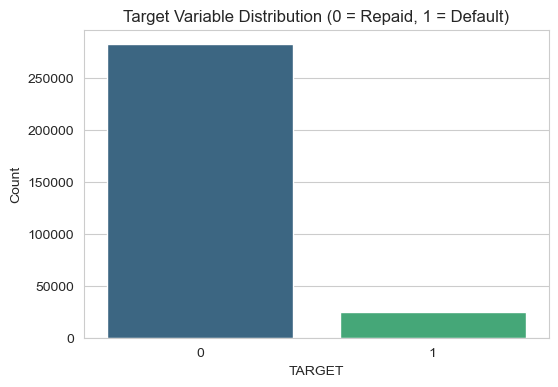

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=app_df, palette='viridis')
plt.title("Target Variable Distribution (0 = Repaid, 1 = Default)")
plt.xlabel("TARGET")
plt.ylabel("Count")
plt.show()

In [9]:
#Separate Numerical and Categorical Columns
#Splits columns into numerical vs categorical.
numerical_cols = app_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = app_df.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nNumerical Columns Count:", len(numerical_cols))
print("Categorical Columns Count:", len(categorical_cols))


Numerical Columns Count: 106
Categorical Columns Count: 16


Comment:

- The dataset contains both numerical and categorical features.
- Numerical: Continuous variables like income, credit, age.
- Categorical: Client demographics, contract types, occupation, etc.
- Knowing this distinction is important for preprocessing (scaling, encoding).

In [10]:
# Preview Categorical Columns with Unique Values
#Displays unique values for some categorical variables.
print("\n Sample Categorical Columns and Unique Values ")
for col in categorical_cols[:10]:  # showing only first 10 for readability
    print(f"{col}: {app_df[col].nunique()} unique values")


 Sample Categorical Columns and Unique Values 
NAME_CONTRACT_TYPE: 2 unique values
CODE_GENDER: 3 unique values
FLAG_OWN_CAR: 2 unique values
FLAG_OWN_REALTY: 2 unique values
NAME_TYPE_SUITE: 7 unique values
NAME_INCOME_TYPE: 8 unique values
NAME_EDUCATION_TYPE: 5 unique values
NAME_FAMILY_STATUS: 6 unique values
NAME_HOUSING_TYPE: 6 unique values
OCCUPATION_TYPE: 18 unique values


Comment:

- The categorical variables show a mix of binary, low-cardinality, and high-cardinality features.
- NAME_CONTRACT_TYPE (2 values) → distinguishes between loan types (Cash loan vs Revolving loan).                              - CODE_GENDER (3 values) → includes Male, Female, and a rare category XNA.
- FLAG_OWN_CAR (2 values) & FLAG_OWN_REALTY (2 values) → binary ownership indicators.
- NAME_TYPE_SUITE (7 values) → indicates who accompanied the client at the loan signing (e.g., Spouse, Children, Unaccompanied).
- NAME_INCOME_TYPE (8 values) → client’s employment status (e.g., Working, Pensioner, State servant).
- NAME_EDUCATION_TYPE (5 values) → highest education level (Secondary, Higher, Academic, etc.).
- NAME_FAMILY_STATUS (6 values) → marital status of the applicant.
- NAME_HOUSING_TYPE (6 values) → living situation (e.g., House / apartment, Municipal apartment, Rented).
- OCCUPATION_TYPE (18 values) → relatively high cardinality with many job categories; will require frequency grouping or one-hot encoding during preprocessing.

Key takeaway: Some categorical variables are simple binary flags, while others (like occupation and income type) have multiple levels that may influence default risk. These will need encoding later before modeling.

In [196]:
#Summary statistics for numerical features
#Gives summary statistics for numeric variables.
print("\n Summary Statistics (Numerical Variables) ")
display(app_df[numerical_cols].describe().T.head(10))


 Summary Statistics (Numerical Variables) 


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.00000,-19682.000000,-15750.00000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.00000,-2760.000000,-1213.00000,-289.000000,3.652430e+05


Comment:

- This table provides descriptive statistics for the first 10 numerical variables.
 - Key points observed:
   * AMT_INCOME_TOTAL: Wide variation in income, from very low to                    extremely high values. Possible outliers exist.
   * AMT_CREDIT: Loan amounts also vary widely, which could      distort averages.
   * DAYS_BIRTH: Values are negative because they represent days                   before the current date. Will need to convert    into positive age (years).
   * DAYS_EMPLOYED: Some extreme values (e.g., 365243) act as   placeholders for “not employed” or missing data → must be cleaned.
   * AMT_ANNUITY: Missing values and extreme values should be checked, as this represents repayment amount.
   * CNT_FAM_MEMBERS: Mostly small family sizes, but needs outlier check for unrealistic entries.
    
Key takeaway: Numerical features show skewness, outliers, and placeholder anomalies (e.g., DAYS_EMPLOYED).
These need cleaning + transformations before reliable analysis. 

In [197]:
print("\n Missing Values (% of total) ")
missing_values = (app_df.isnull().sum() / len(app_df)) * 100
missing_values = missing_values.sort_values(ascending=False)
display(missing_values.head(60))


 Missing Values (% of total) 


COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56

Comment:

- OCCUPATION_TYPE has ~30% missing values -> can impute with "Unknown".

- EXT_SOURCE_3 also has high missing -> important feature, so we may impute instead of drop.

- Columns with >40% missing could be dropped (little predictive power).

Percentage of Missing Values in Each Column:

COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_AVG              69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64


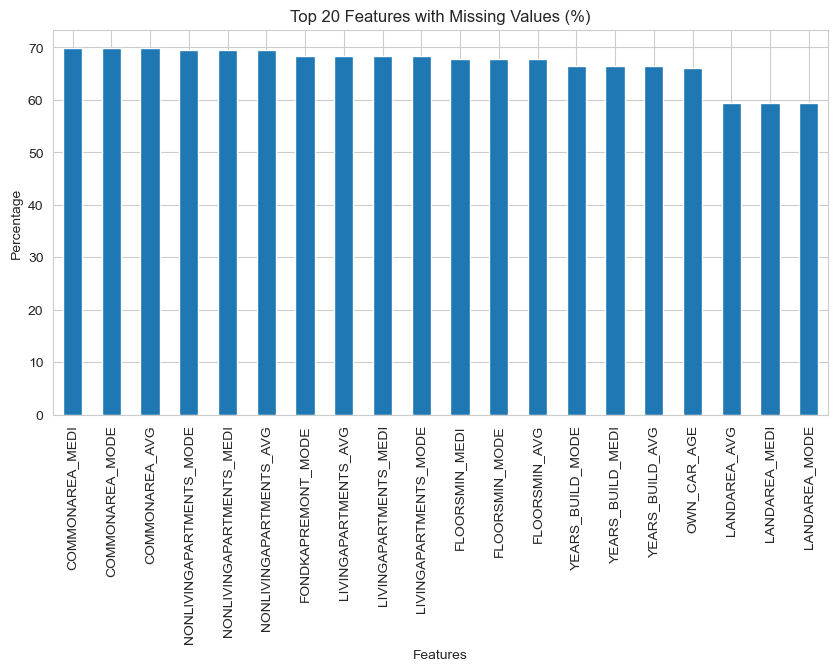

In [198]:
# Calculate percentage of missing values
missing_values = app_df.isnull().sum() / len(app_df) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Percentage of Missing Values in Each Column:\n")
print(missing_values)

# Optional: visualize top 20
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
missing_values.head(20).plot(kind='bar')
plt.title("Top 20 Features with Missing Values (%)")
plt.ylabel("Percentage")
plt.xlabel("Features")
plt.show()

Missing Value Analysis

After exploring the dataset structure, the next step is to identify and quantify missing values.
This helps us decide whether to drop columns with too many missing entries or to impute missing values where possible.
 - We calculate the percentage of missing values for each column.
 - Columns with a very high percentage of missing values (e.g., >50%) may be dropped.
 - Columns with moderate missing values can be treated using imputation techniques (mean, median, mode, or domain-         specific logic).
 - Columns with very few missing values (<1%) usually have minimal impact and can be safely imputed.
   
      *The chart below highlights the top 20 columns with the highest percentage of missing values.

**OCCUPATION_TYPE **

OCCUPATION_TYPE missing: 31.345545%



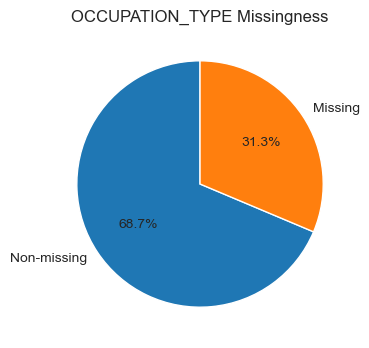

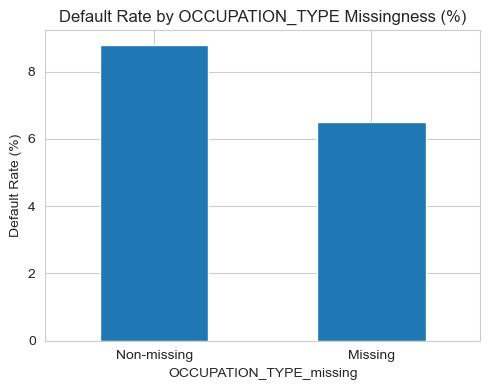

In [199]:
col = 'OCCUPATION_TYPE'
if col in app_df.columns:
    pct = app_df[col].isnull().mean() * 100
    print(f"{col} missing: {pct:.6f}%\n")
    
    # Pie chart for missing vs non-missing
    counts = app_df[col].isnull().value_counts()
    non_missing = counts.get(False, 0)
    missing = counts.get(True, 0)
    plt.figure(figsize=(4,4))
    plt.pie([non_missing, missing],
            labels=['Non-missing', 'Missing'],
            autopct='%.1f%%',
            startangle=90)
    plt.title(f"{col} Missingness")
    plt.show()
    
    # Default rate by missingness (if TARGET exists)
    if 'TARGET' in app_df.columns:
        df_temp = app_df[[col, 'TARGET']].copy()
        df_temp[f'{col}_missing'] = df_temp[col].isnull()
        rates = df_temp.groupby(f'{col}_missing')['TARGET'].mean() * 100
        plt.figure(figsize=(5,4))
        rates.plot(kind='bar')
        plt.title(f"Default Rate by {col} Missingness (%)")
        plt.ylabel("Default Rate (%)")
        plt.xticks([0,1], ['Non-missing','Missing'], rotation=0)
        plt.tight_layout()
        plt.show()
else:
    print(f"Column {col} not found in dataframe.")

OCCUPATION_TYPE — Missingness (approx 31.3%)

This column has a considerable proportion of missing values.

 * We show the exact percentage and a pie chart (missing vs non-missing).
 * Then we check whether missingness is associated with higher default rate (TARGET).

**EXT_SOURCE_3**

EXT_SOURCE_3 missing: 19.825307%



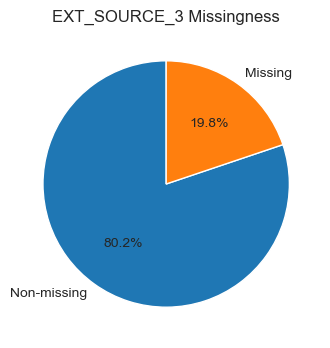

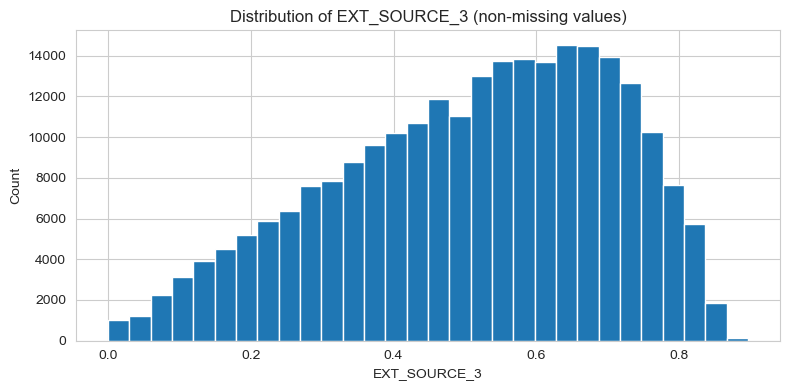

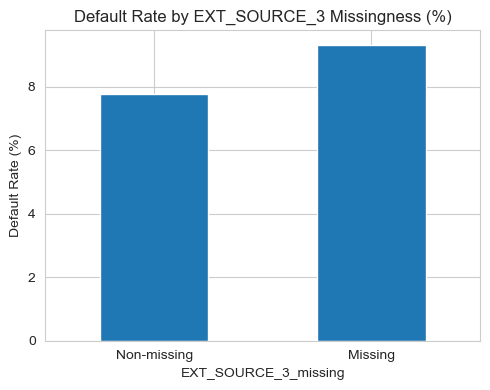

In [200]:
col = 'EXT_SOURCE_3'
import matplotlib.pyplot as plt

if col in app_df.columns:
    pct = app_df[col].isnull().mean() * 100
    print(f"{col} missing: {pct:.6f}%\n")
    
    # Pie chart
    counts = app_df[col].isnull().value_counts()
    non_missing = counts.get(False, 0)
    missing = counts.get(True, 0)
    plt.figure(figsize=(4,4))
    plt.pie([non_missing, missing],
            labels=['Non-missing','Missing'],
            autopct='%.1f%%',
            startangle=90)
    plt.title(f"{col} Missingness")
    plt.show()
    
    # Distribution of available EXT_SOURCE_3
    plt.figure(figsize=(8,4))
    app_df[col].dropna().hist(bins=30)
    plt.title(f"Distribution of {col} (non-missing values)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
    # Missingness vs TARGET
    if 'TARGET' in app_df.columns:
        df_temp = app_df[[col, 'TARGET']].copy()
        df_temp[f'{col}_missing'] = df_temp[col].isnull()
        rates = df_temp.groupby(f'{col}_missing')['TARGET'].mean() * 100
        plt.figure(figsize=(5,4))
        rates.plot(kind='bar')
        plt.title(f"Default Rate by {col} Missingness (%)")
        plt.ylabel("Default Rate (%)")
        plt.xticks([0,1], ['Non-missing','Missing'], rotation=0)
        plt.tight_layout()
        plt.show()
else:
    print(f"Column {col} not found in dataframe.")

EXT_SOURCE_3 — Missingness (approx 19.8%)

This is an important continuous external score. We'll print the missing percentage, show missing vs non-missing pie, and visualize the distribution of available scores.

**AMT_REQ_CREDIT_BUREAU**

Missing percentages for bureau cols:

AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631


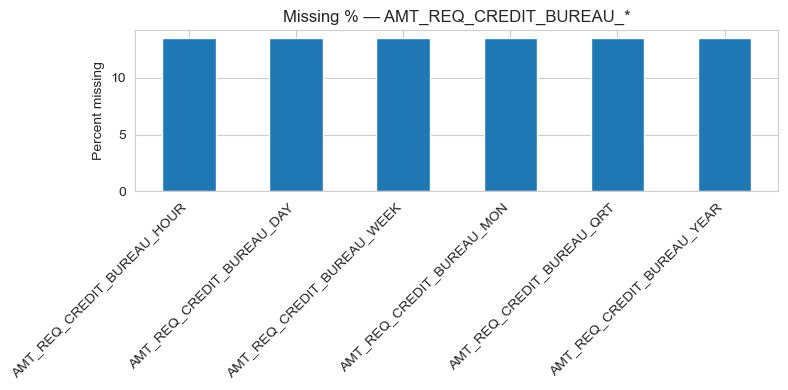

In [201]:
bureau_cols = [
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

present_bureau = [c for c in bureau_cols if c in app_df.columns]
if present_bureau:
    miss_bureau = app_df[present_bureau].isnull().sum() / len(app_df) * 100
    print("Missing percentages for bureau cols:\n")
    print(miss_bureau.to_string())
    
    # Bar plot
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,4))
    miss_bureau.plot(kind='bar')
    plt.title("Missing % — AMT_REQ_CREDIT_BUREAU_*")
    plt.ylabel("Percent missing")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No AMT_REQ_CREDIT_BUREAU_* columns found in dataframe.")


Credit bureau request features — AMT_REQ_CREDIT_BUREAU_

These features (hour, day, week, month, quarter, year) have similar missing percentages (~13.5%).
We print their percentages and show a grouped bar plot for these columns.

**small-missing features**

In [202]:
small_cols = [
    'NAME_TYPE_SUITE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
    'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'
]
present_small = [c for c in small_cols if c in app_df.columns]

if present_small:
    miss_small = app_df[present_small].isnull().sum() / len(app_df) * 100
    print(miss_small.to_string())
else:
    print("No small-missing-feature columns found in dataframe.")

NAME_TYPE_SUITE             0.420148
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
EXT_SOURCE_2                0.214626
AMT_GOODS_PRICE             0.090403
AMT_ANNUITY                 0.003902
CNT_FAM_MEMBERS             0.000650
DAYS_LAST_PHONE_CHANGE      0.000325


Smaller-missing features (NAME_TYPE_SUITE, social-circle, EXT_SOURCE_2, AMT_GOODS_PRICE, AMT_ANNUITY, CNT_FAM_MEMBERS, DAYS_LAST_PHONE_CHANGE)

These have very small missing percentages; we print their exact values.

**Barplot of top missing columns**

In [203]:
# Calculate % of missing values
missing_app = app_df.isnull().mean().sort_values(ascending=False) * 100

print("Top 15 Columns with Missing Values (%):")
print(missing_app.head(15))

Top 15 Columns with Missing Values (%):
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
dtype: float64


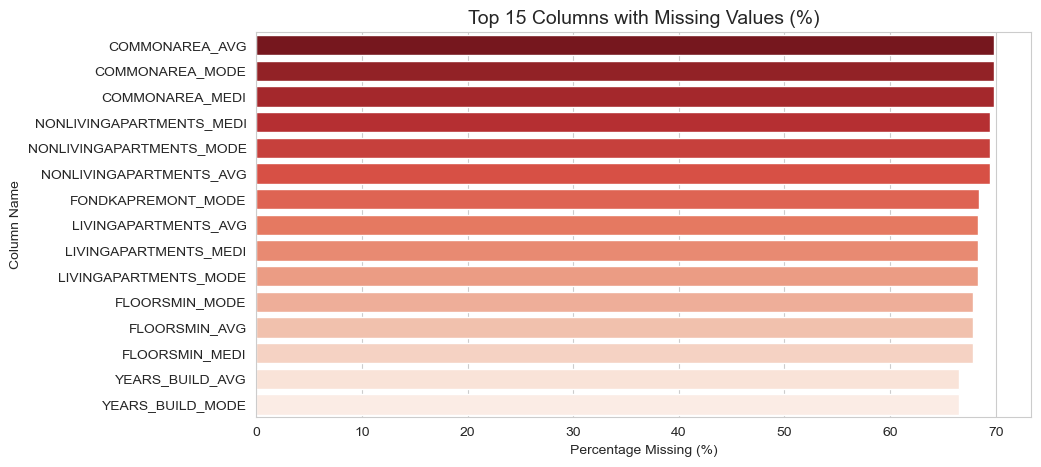

In [204]:
plt.figure(figsize=(10,5))
top_missing = missing_app.head(15).reset_index()
top_missing.columns = ['Column', 'MissingPct']

sns.barplot(x="MissingPct", y="Column", data=top_missing, palette="Reds_r")
plt.title("Top 15 Columns with Missing Values (%)", fontsize=14)
plt.xlabel("Percentage Missing (%)")
plt.ylabel("Column Name")
plt.show()

## Missing Value Analysis - (Application Data) ##

- The barplot shows the top 15 columns with missing values.  
- Columns like *OWN_CAR_AGE, **OCCUPATION_TYPE, and **AMT_ANNUITY* have significant missingness.  
- The heatmap (yellow = missing) confirms that some columns have large gaps across many rows.


## Univariate Analysis for Application Data ##

**Target Variable** 


 Target Variable Distribution 
TARGET
0    282686
1     24825
Name: count, dtype: int64

 Proportion of Target Classes: 
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


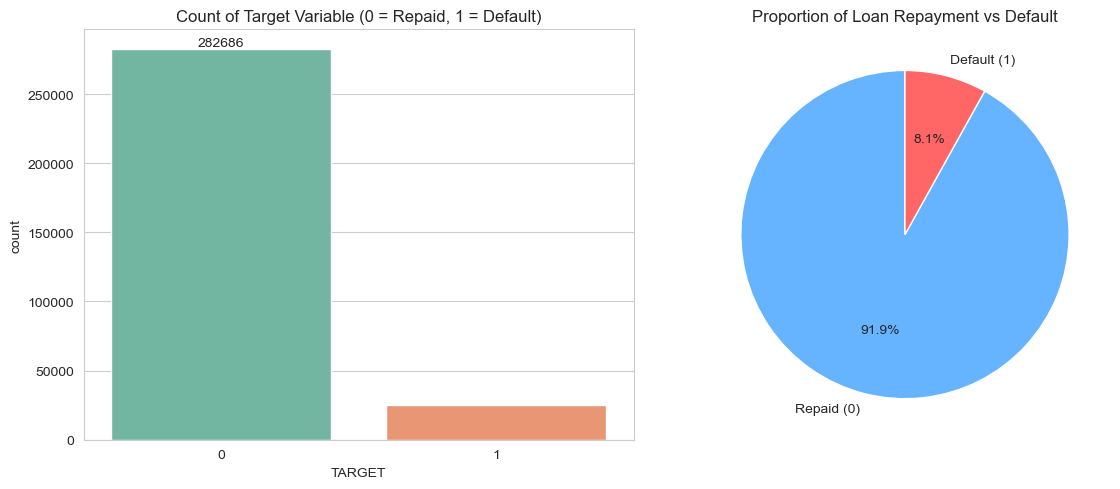

In [205]:
# Distribution of Target variable (0 = Repaid, 1 = Default)
print("\n Target Variable Distribution ")
print(app_df['TARGET'].value_counts())
print("\n Proportion of Target Classes: ")
print(app_df['TARGET'].value_counts(normalize=True))

# Plot Target variable distribution
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Countplot
sns.countplot(x='TARGET', data=app_df, palette='Set2', ax=ax[0])
ax[0].set_title("Count of Target Variable (0 = Repaid, 1 = Default)")
ax[0].bar_label(ax[0].containers[0])  # show counts

# Pie chart
app_df['TARGET'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['Repaid (0)','Default (1)'],
    colors=['#66b3ff','#ff6666'], ax=ax[1], startangle=90
)
ax[1].set_ylabel("")
ax[1].set_title("Proportion of Loan Repayment vs Default")

plt.tight_layout()
plt.show()

Target Variable Distribution

- Around *92% of clients repaid loans (TARGET=0)*.  
- Only *~8% defaulted (TARGET=1)*.  
- This shows a *class imbalance problem* (many more repaid loans than defaults).  
- Important for modeling: imbalance must be handled with techniques such as *SMOTE, undersampling, or class weights*.

In [207]:
## Univariate Analysis - Categorical Variables ##

Found 16 categorical variables


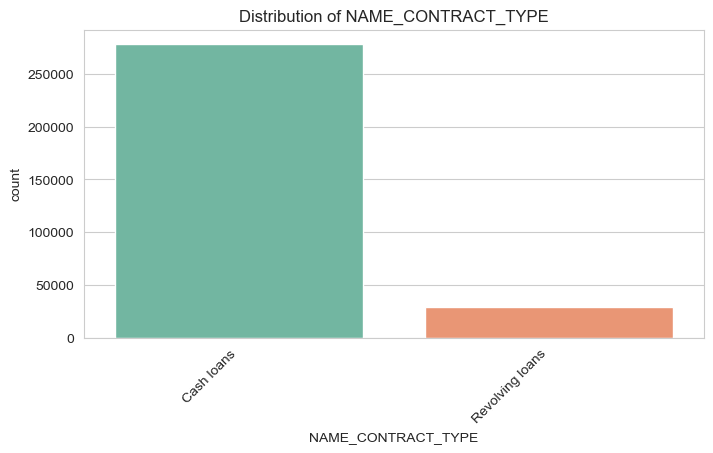

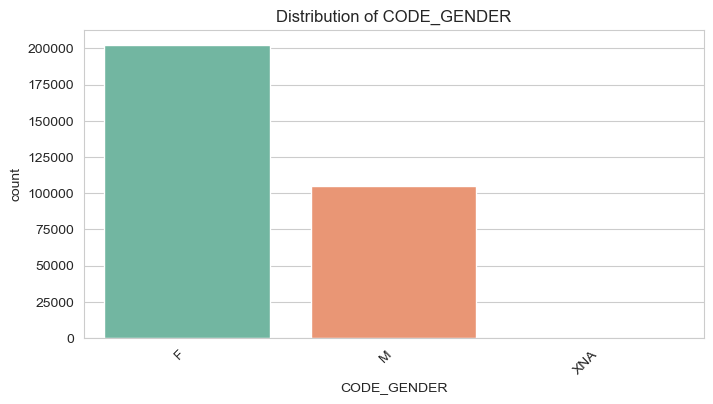

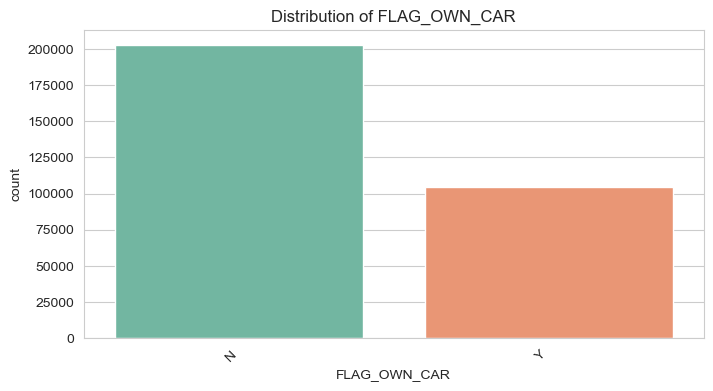

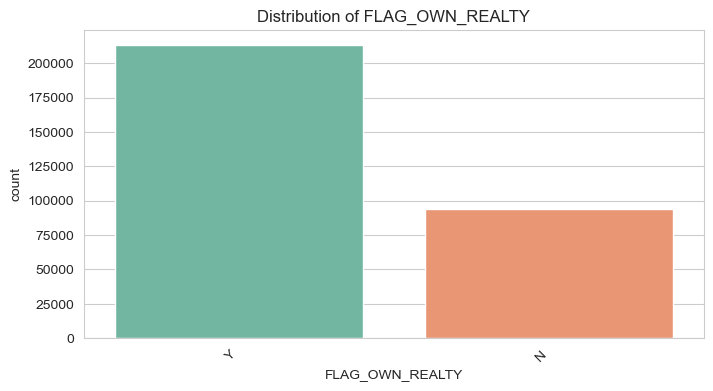

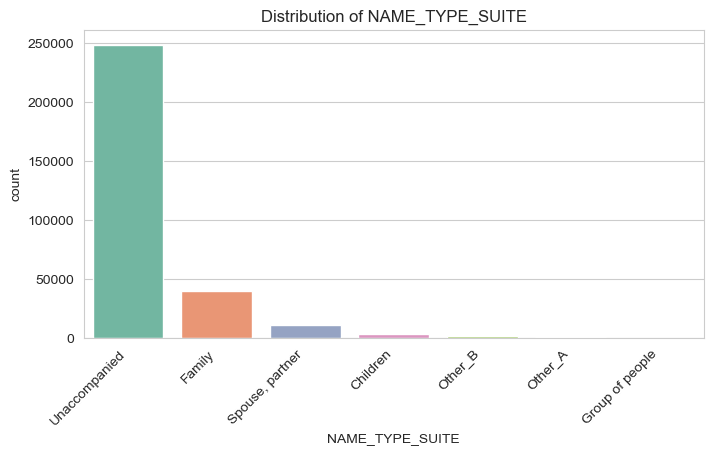

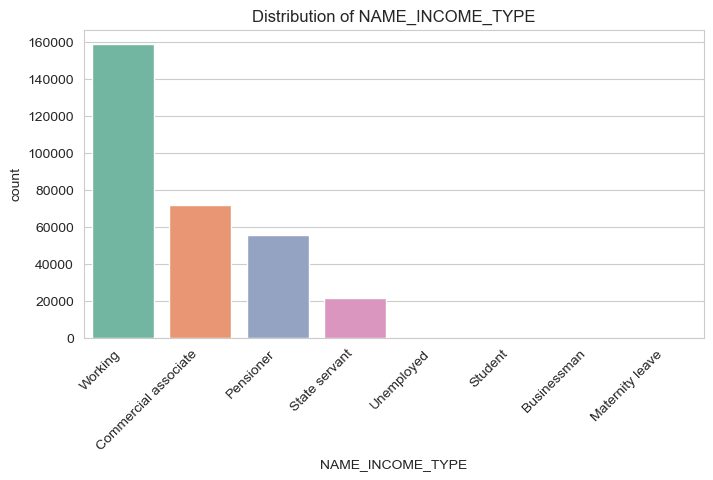

In [209]:
categorical_cols = app_df.select_dtypes(include=['object']).columns.tolist()
print(f"Found {len(categorical_cols)} categorical variables")

# Plot first 6 categorical variables for readability
for col in categorical_cols[:6]:
    plt.figure(figsize=(8,4))
    sns.countplot(data=app_df, x=col, order=app_df[col].value_counts().index, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
    plt.show()

- Most applicants have *Cash loans* rather than revolving credit.  
- The dataset is dominated by *female applicants* (CODE_GENDER).  
- Education distribution shows most have *secondary/special education*

**Categorical Feature: Gender (CODE_GENDER)**

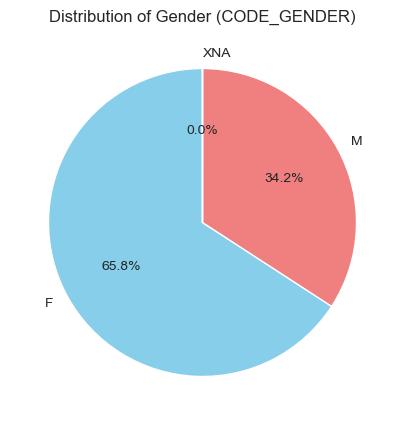

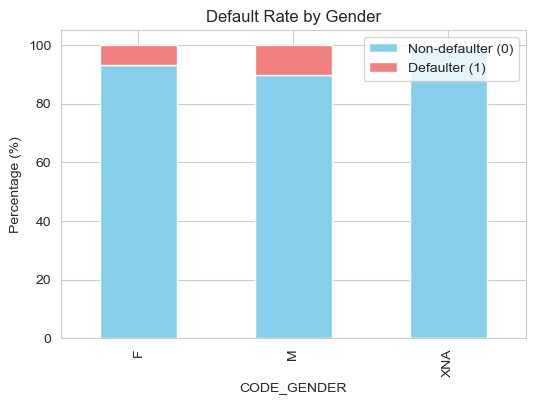

In [210]:
# Pie chart for Gender
plt.figure(figsize=(5,5))
app_df['CODE_GENDER'].value_counts().plot.pie(
    autopct="%.1f%%", labels=app_df['CODE_GENDER'].value_counts().index,
    colors=["skyblue","lightcoral","lightgreen"], startangle=90
)
plt.title("Distribution of Gender (CODE_GENDER)")
plt.ylabel("")
plt.show()

# Stacked percentage barplot for Gender vs TARGET
gender_target = pd.crosstab(app_df['CODE_GENDER'], app_df['TARGET'], normalize='index') * 100
gender_target.plot(kind="bar", stacked=True, figsize=(6,4), color=["skyblue","lightcoral"])
plt.title("Default Rate by Gender")
plt.ylabel("Percentage (%)")
plt.legend(["Non-defaulter (0)","Defaulter (1)"])
plt.show()

Categorical Feature: Gender (CODE_GENDER)

 - This feature indicates the gender of the client.
 - We first visualize its overall distribution using a pie chart.
 - Then, we analyze how default rates differ between genders using a stacked percentage barplot.
 - Insights from this plot can reveal whether one gender is more likely to default than the other.

**Categorical Feature: Income Type (NAME_INCOME_TYPE)**

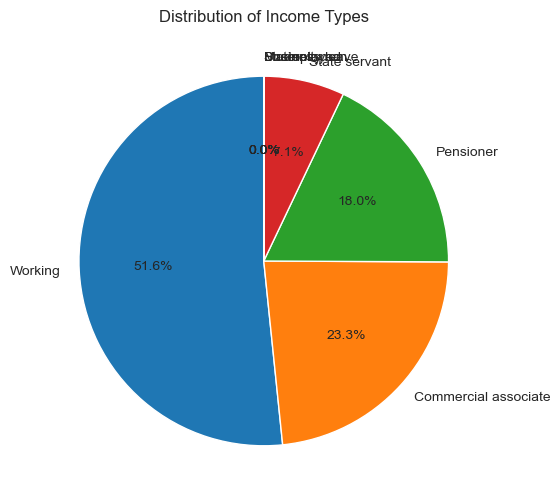

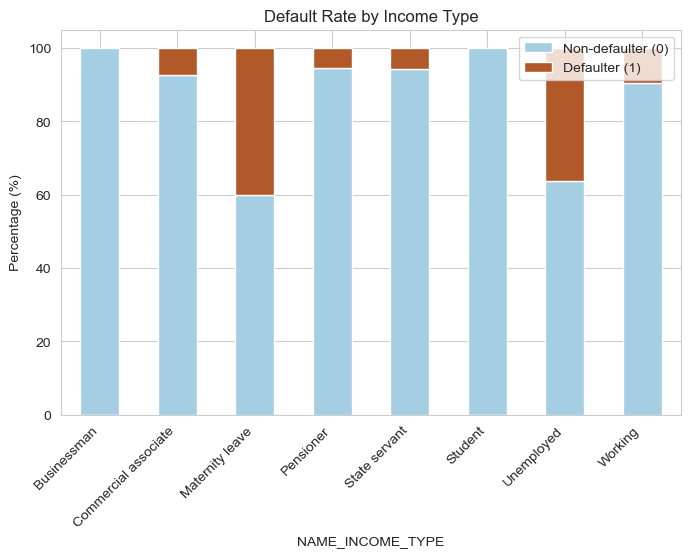

In [211]:
# Pie chart for Income Type
plt.figure(figsize=(6,6))
app_df['NAME_INCOME_TYPE'].value_counts().plot.pie(
    autopct="%.1f%%", startangle=90
)
plt.title("Distribution of Income Types")
plt.ylabel("")
plt.show()

# Stacked percentage barplot for Income Type vs TARGET
income_target = pd.crosstab(app_df['NAME_INCOME_TYPE'], app_df['TARGET'], normalize='index') * 100
income_target.plot(kind="bar", stacked=True, figsize=(8,5), colormap="Paired")
plt.title("Default Rate by Income Type")
plt.ylabel("Percentage (%)")
plt.legend(["Non-defaulter (0)","Defaulter (1)"])
plt.xticks(rotation=45, ha="right")
plt.show()

Categorical Feature: Income Type (NAME_INCOME_TYPE)

 - This feature describes the client’s income source (e.g., Working, Pensioner, Commercial associate).
 - We use a pie chart to show the proportion of different income categories in the dataset.
 - Then, we plot a stacked percentage barplot to compare default rates across income types.
 - This helps identify safer borrower groups (like Pensioners) and riskier groups (like State servants or Commercial associ

**Categorical Feature: Education Type (NAME_EDUCATION_TYPE)**

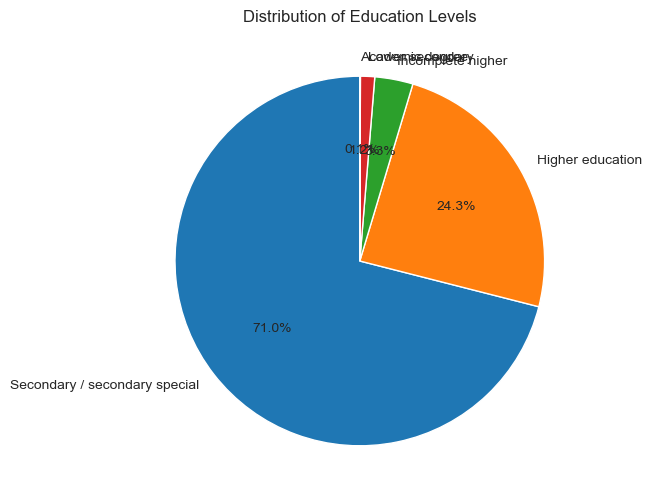

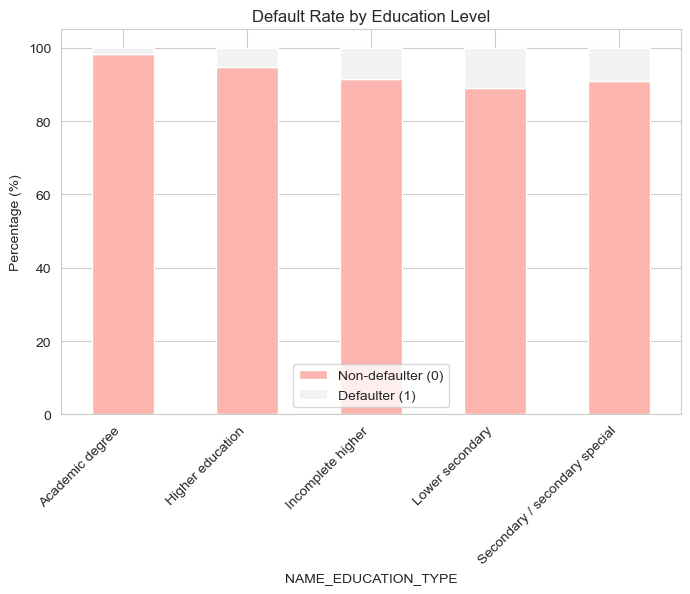

In [212]:
# Pie chart for Education Type
plt.figure(figsize=(6,6))
app_df['NAME_EDUCATION_TYPE'].value_counts().plot.pie(
    autopct="%.1f%%", startangle=90
)
plt.title("Distribution of Education Levels")
plt.ylabel("")
plt.show()

# Stacked percentage barplot for Education Type vs TARGET
edu_target = pd.crosstab(app_df['NAME_EDUCATION_TYPE'], app_df['TARGET'], normalize='index') * 100
edu_target.plot(kind="bar", stacked=True, figsize=(8,5), colormap="Pastel1")
plt.title("Default Rate by Education Level")
plt.ylabel("Percentage (%)")
plt.legend(["Non-defaulter (0)","Defaulter (1)"])
plt.xticks(rotation=45, ha="right")
plt.show()

Categorical Feature: Education Type (NAME_EDUCATION_TYPE)

 - This feature represents the education level of the applicant (e.g., Secondary, Higher, Academic degree).
 - We plot a pie chart to show category proportions.
 - Then, a stacked percentage barplot to analyze how education level impacts default risk.
 - From this, we can observe whether lower education levels correspond to higher default rates

## Univariate Analysis for Numerical variable ##

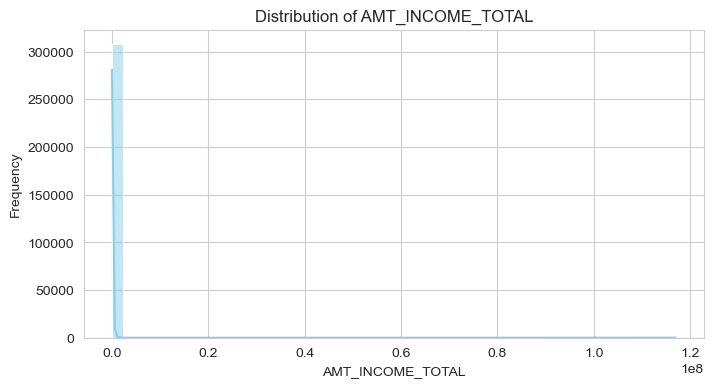

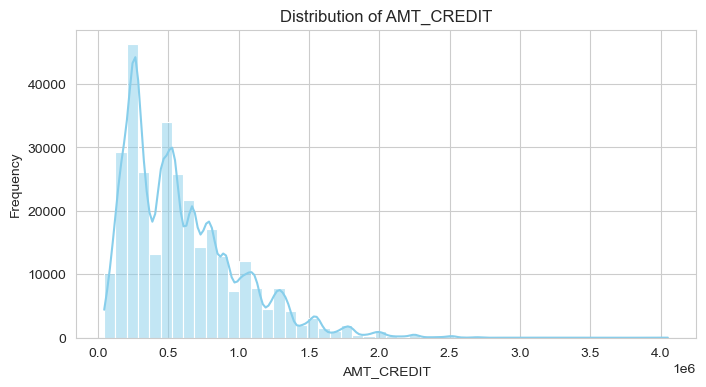

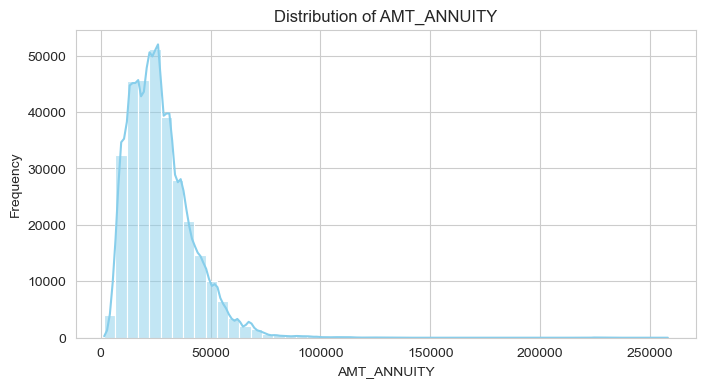

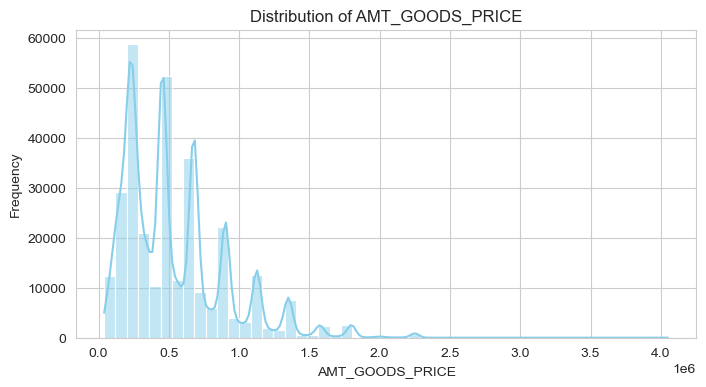

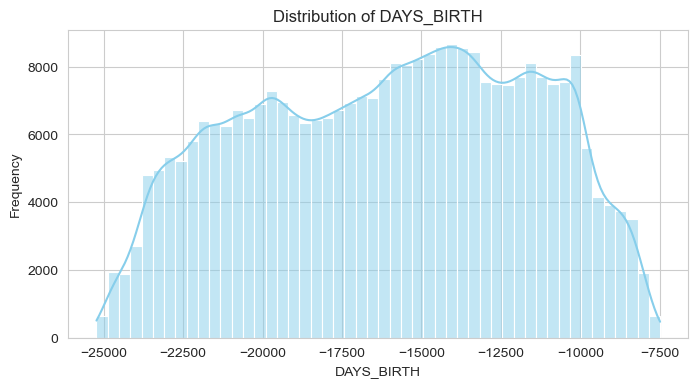

In [213]:
num_vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']

for col in num_vars:
    plt.figure(figsize=(8,4))
    sns.histplot(app_df[col].dropna(), bins=50, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

Univariate Analysis - Numerical Variables

We analyze the distributions of key numerical features using *histograms with KDE curves* (to show both frequency and smooth density).

*Insights from the plots:*

- **Applicant Income (AMT_INCOME_TOTAL)**  
  - Distribution is *heavily right-skewed*.  
  - Most clients earn below 200k, but a small fraction earns far higher, creating a long tail.  
  - High-income outliers can distort averages.  

- **Credit Amount (AMT_CREDIT)**  
  - Peaks appear at common loan sizes (e.g., 100k, 500k).  
  - Suggests loans are issued in standard blocks.  
  - Values are also right-skewed.  

- **Annuity Amount (AMT_ANNUITY)**  
  - Smaller payments are more frequent, with a few very large annuities.  
  - Reflects affordability for most clients vs riskier large loans.  

- **Goods Price (AMT_GOODS_PRICE)**  
  - Clear clusters around specific price points.  
  - Indicates popular loan purposes (vehicles, housing, etc.).  

- **Age (from DAYS_BIRTH)**  
  - Distribution resembles a normal curve.  
  - Most applicants are between *25–60 years old*.  
  - Very few young or elderly clients take loans.  

**Business Interpretation:**  
- Financial variables (income, credit, annuity) are skewed → require *scaling and outlier handling* before modeling.  
- Standard loan sizes and goods prices suggest *bank lending policies* or common customer needs.  
- Age distribution highlights the *prime customer segment* for loans. 

**AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL**

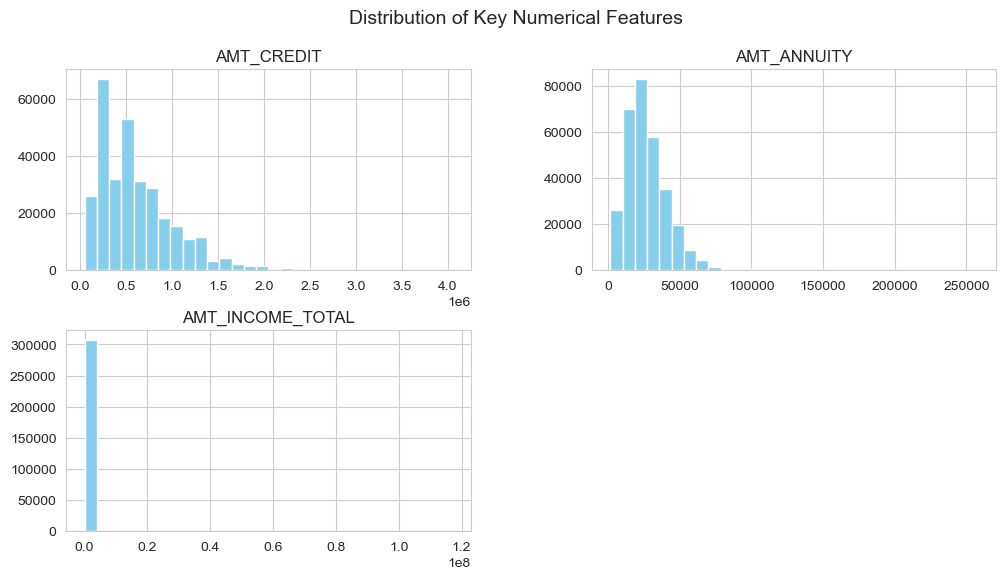

In [35]:
num_cols = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL']

app_df[num_cols].hist(bins=30, figsize=(12,6), color='skyblue')
plt.suptitle("Distribution of Key Numerical Features", fontsize=14)
plt.show()

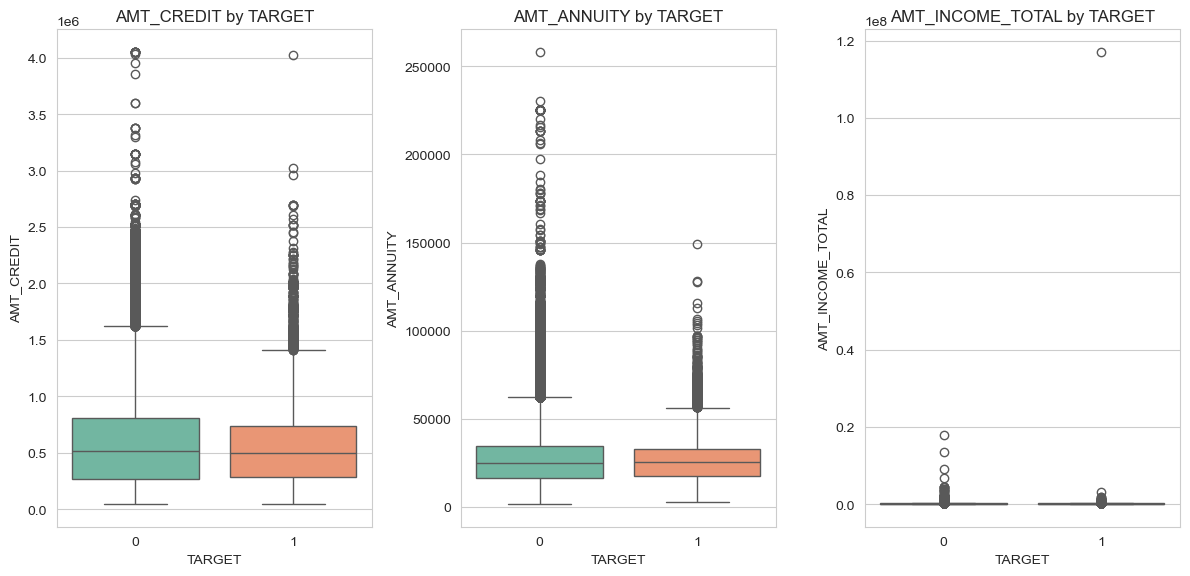

In [36]:
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='TARGET', y=col, data=app_df, palette='Set2')
    plt.title(f"{col} by TARGET")
plt.tight_layout()
plt.show()

 - Loan Amount (AMT_CREDIT) → the principal loan applied for.
 - Annuity Amount (AMT_ANNUITY) → the repayment amount (usually yearly or monthly).
 - Total Income (AMT_INCOME_TOTAL) → the applicant’s reported income.

# Outlier Detection & Treatment - Application Data #

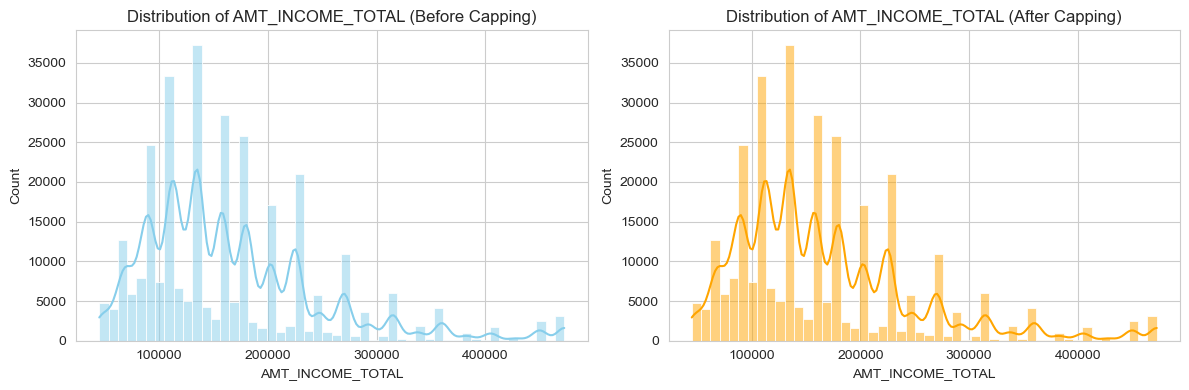

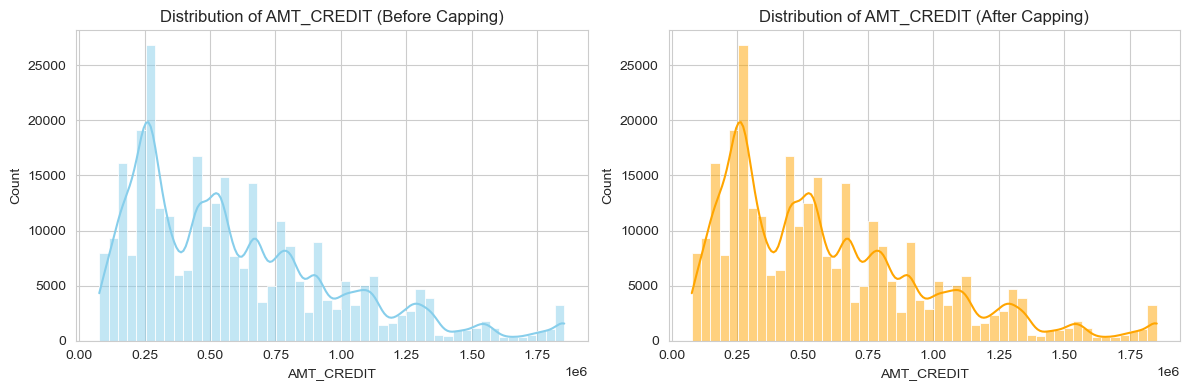

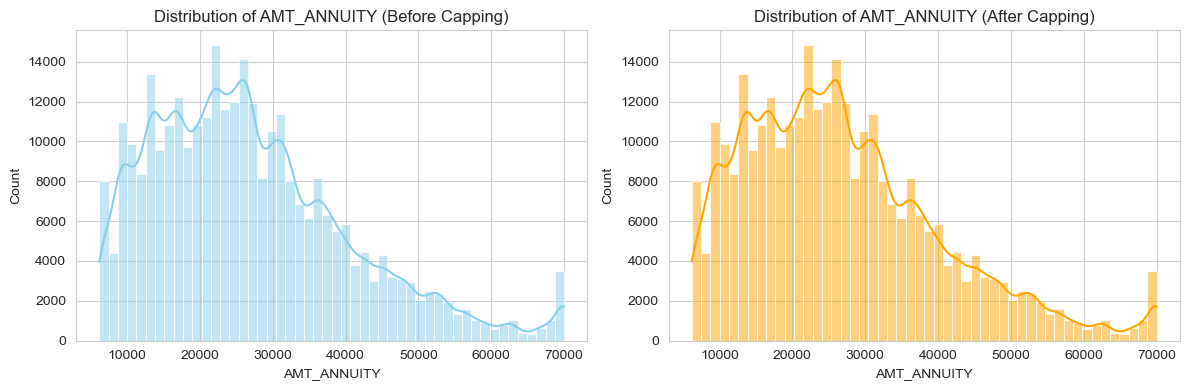

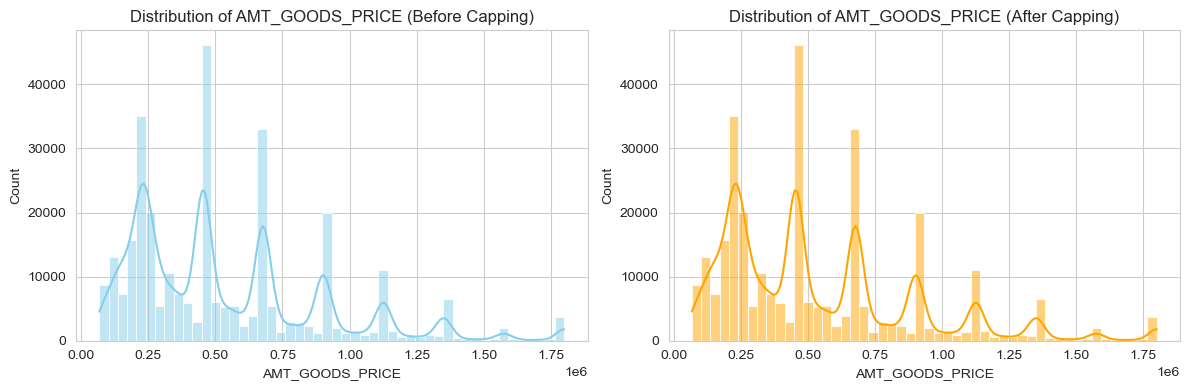

 Outliers capped at 1st and 99th percentiles for selected variables.


In [217]:
# Select key numeric variables
num_vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

for col in num_vars:
    plt.figure(figsize=(12,4))
    
    # Histogram before capping
    plt.subplot(1,2,1)
    sns.histplot(app_df[col], bins=50, kde=True, color='skyblue')
    plt.title(f"Distribution of {col} (Before Capping)")

    # Cap outliers
    lower = app_df[col].quantile(0.01)
    upper = app_df[col].quantile(0.99)
    app_df[col] = np.where(app_df[col] < lower, lower,
                           np.where(app_df[col] > upper, upper, app_df[col]))
    
    # Histogram after capping
    plt.subplot(1,2,2)
    sns.histplot(app_df[col], bins=50, kde=True, color='orange')
    plt.title(f"Distribution of {col} (After Capping)")

    plt.tight_layout()
    plt.show()

print(" Outliers capped at 1st and 99th percentiles for selected variables.")

We examine key numerical variables for outliers:

- *Before capping*: Histograms show strong right-skew (especially for income, credit, and annuity).  
- *After capping*: Extreme values beyond the 1st and 99th percentiles were replaced, reducing skew.  

📌 *Insights:*
- Applicant income and credit amounts had many extreme values.  
- Outlier capping smooths the distribution without removing entire rows.  
- This ensures *robust analysis and prevents distortion* in later modeling steps.

# Data Cleaning & Transformation - Application Data #

In [162]:
# 1. Convert DAYS_BIRTH (from negative days to positive years)
app_df['AGE_YEARS'] = (app_df['DAYS_BIRTH'] / -365).astype(int)

# 2. Convert DAYS_EMPLOYED (negative → positive years, handle anomalies)
app_df['YEARS_EMPLOYED'] = app_df['DAYS_EMPLOYED'].apply(lambda x: np.nan if x == 365243 else -x/365)

# Create flag for anomalous employment values
app_df['EMPLOYED_ANOMALY'] = app_df['DAYS_EMPLOYED'].apply(lambda x: 1 if x == 365243 else 0)

# 3. Drop duplicates if any
before_shape = app_df.shape
app_df = app_df.drop_duplicates()
after_shape = app_df.shape

print(f"Shape before removing duplicates: {before_shape}")
print(f"Shape after removing duplicates: {after_shape}")

# 4. Display new columns
print("\nNewly created columns: AGE_YEARS, YEARS_EMPLOYED, EMPLOYED_ANOMALY")
print(app_df[['AGE_YEARS','YEARS_EMPLOYED','EMPLOYED_ANOMALY']].head())

Shape before removing duplicates: (307511, 125)
Shape after removing duplicates: (307511, 125)

Newly created columns: AGE_YEARS, YEARS_EMPLOYED, EMPLOYED_ANOMALY
   AGE_YEARS  YEARS_EMPLOYED  EMPLOYED_ANOMALY
0         25        1.745205                 0
1         45        3.254795                 0
2         52        0.616438                 0
3         52        8.326027                 0
4         54        8.323288                 0


Data Cleaning & Transformation

- *DAYS_BIRTH* was negative → converted to *AGE_YEARS* (positive integers).  
- *DAYS_EMPLOYED* had a strange value of 365243 → treated as an anomaly.  
  - Converted employment days into *YEARS_EMPLOYED*.  
  - Created an *EMPLOYED_ANOMALY flag* to capture unrealistic cases.  
- Checked and removed *duplicates* from the dataset.  

📌 *Insights:*
- Age distribution is now interpretable in years.  
- Employment anomalies are preserved as a separate feature instead of being deleted.  
- Dataset is cleaned and ready for analysis/modeling.

# Feature Engineering - Application Data #         

In [163]:
# 1. Credit to Income Ratio
app_df['CREDIT_INCOME_RATIO'] = app_df['AMT_CREDIT'] / app_df['AMT_INCOME_TOTAL']

# 2. Annuity to Income Ratio
app_df['ANNUITY_INCOME_RATIO'] = app_df['AMT_ANNUITY'] / app_df['AMT_INCOME_TOTAL']

# 3. Credit to Goods Price Ratio
app_df['CREDIT_GOODS_RATIO'] = app_df['AMT_CREDIT'] / app_df['AMT_GOODS_PRICE']

# 4. Employment to Age Ratio
app_df['EMPLOYED_TO_AGE_RATIO'] = app_df['YEARS_EMPLOYED'] / app_df['AGE_YEARS']

# 5. Flag for high risk annuity burden
app_df['HIGH_ANNUITY_FLAG'] = np.where(app_df['ANNUITY_INCOME_RATIO'] > 0.3, 1, 0)

print("Feature engineering completed. New columns added:")
print(['CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'CREDIT_GOODS_RATIO',
       'EMPLOYED_TO_AGE_RATIO', 'HIGH_ANNUITY_FLAG'])

# Preview engineered features
app_df[['CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO',
        'CREDIT_GOODS_RATIO', 'EMPLOYED_TO_AGE_RATIO',
        'HIGH_ANNUITY_FLAG']].head()

Feature engineering completed. New columns added:
['CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'CREDIT_GOODS_RATIO', 'EMPLOYED_TO_AGE_RATIO', 'HIGH_ANNUITY_FLAG']


,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,CREDIT_GOODS_RATIO,EMPLOYED_TO_AGE_RATIO,HIGH_ANNUITY_FLAG
0,2.007889,0.121978,1.158397,0.069808,0
1,4.790750,0.132217,1.145199,0.072329,0
2,2.000000,0.100000,1.000000,0.011855,0
3,2.316167,0.219900,1.052803,0.160116,0
4,4.222222,0.179963,1.000000,0.154135,0


We created new derived features to capture *financial pressure and risk profiles*:

- *CREDIT_INCOME_RATIO* → High values = client is borrowing much more compared to income.  
- *ANNUITY_INCOME_RATIO* → Monthly payment as a fraction of income.  
  - Clients with values >0.3 (30%) flagged as *HIGH_ANNUITY_FLAG*.  
- *CREDIT_GOODS_RATIO* → Shows if credit amount matches goods price (large mismatch = risky behavior).  
- *EMPLOYED_TO_AGE_RATIO* → Fraction of life spent employed.  
  - Very low values may indicate instability in work history.  

*Insights:*
- These engineered features highlight *hidden risk signals* that raw data might not reveal.  
- Ratios are easier for business users to interpret compared to raw amounts.

# Data Understanding - Previous Application Data #

In [218]:
print("Shape of Previous Application Data:", prev_df.shape)

# Info about data types & nulls
print("\n Dataset Info ")
print(prev_df.info())

# Preview first 5 rows
print("\n Sample Rows ")
display(prev_df.head())

# Separate numerical vs categorical columns
num_cols_prev = prev_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_prev = prev_df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumerical Columns Count:", len(num_cols_prev))
print("Categorical Columns Count:", len(cat_cols_prev))

# Quick preview of categorical columns unique values (first 8 for readability)
print("\n Sample Categorical Columns and Unique Values ")
for col in cat_cols_prev[:8]:
    print(f"{col}: {prev_df[col].nunique()} unique values")

# Summary statistics for numerical variables (first 8 shown)
print("\n Summary Statistics (Numerical Variables) ")
display(prev_df[num_cols_prev].describe().T.head(8))

Shape of Previous Application Data: (1670214, 37)

 Dataset Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN



Numerical Columns Count: 21
Categorical Columns Count: 16

 Sample Categorical Columns and Unique Values 
NAME_CONTRACT_TYPE: 4 unique values
WEEKDAY_APPR_PROCESS_START: 7 unique values
FLAG_LAST_APPL_PER_CONTRACT: 2 unique values
NAME_CASH_LOAN_PURPOSE: 25 unique values
NAME_CONTRACT_STATUS: 4 unique values
NAME_PAYMENT_TYPE: 4 unique values
CODE_REJECT_REASON: 9 unique values
NAME_TYPE_SUITE: 7 unique values

 Summary Statistics (Numerical Variables) 


,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1000001.0,1461857.25,1923110.5,2384279.75,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,100001.0,189329.00,278714.5,367514.00,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.0,6321.78,11250.0,20658.42,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.0,18720.00,71046.0,180360.00,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.0,24160.50,80541.0,216418.50,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-0.9,0.00,1638.0,7740.00,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.0,50841.00,112320.0,234000.00,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.0,10.00,12.0,15.00,23.000


Data Understanding – Previous Application Data

* Shape: The dataset has x entries, where each row = one past loan application.
* Structure:
     * SK_ID_PREV = Previous application ID.
     * SK_ID_CURR = Client ID (links with application_data).
     * Mix of numerical columns (loan amounts, days, counts) and categorical columns (loan type, purpose, status).
* Categorical Preview: Variables like NAME_CONTRACT_TYPE, NAME_CASH_LOAN_PURPOSE, and NAME_CONTRACT_STATUS have multiple unique categories.
* Numerical Preview: Features like AMT_APPLICATION, AMT_CREDIT, and DAYS_DECISION vary widely and may contain outliers.
  
Business Relevance:
This dataset captures past loan behaviors — approvals, refusals, loan purposes, and amounts.
It is crucial to identify whether certain past behaviors (e.g., repeated refusals, risky loan purposes) predict current loan defaults.

# Data Cleaning - Previous Application Data #

**Missing Value Analysis - Previous Application Data**


 Missing Values (% of total) 


RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
DAYS_LAST_DUE                40.298129
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
dtype: float64

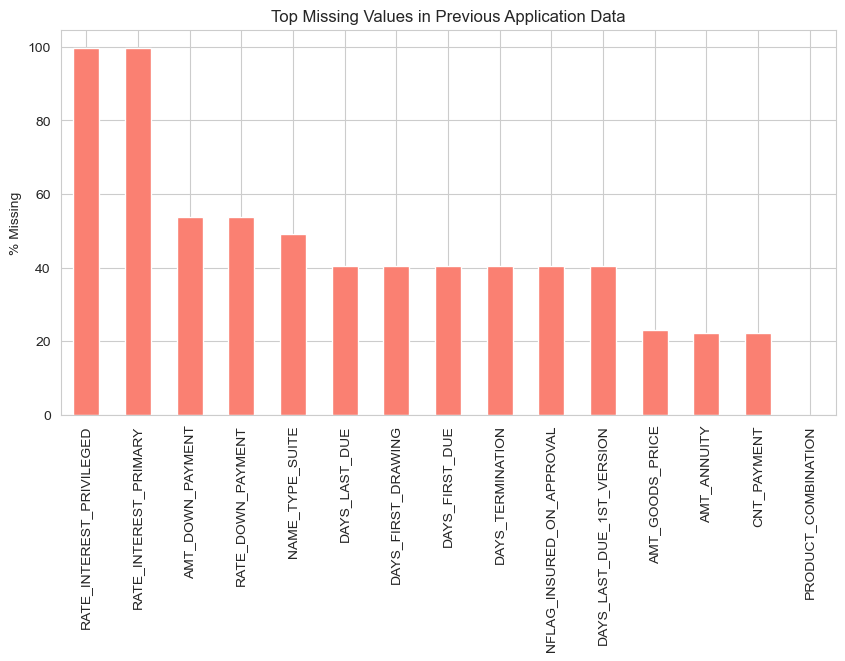

Missing values handled (categorical → 'Unknown', numeric → median).


In [221]:
# Calculate % of missing values
missing_prev = prev_df.isnull().mean() * 100
missing_prev = missing_prev[missing_prev > 0].sort_values(ascending=False)

print("\n Missing Values (% of total) ")
display(missing_prev.head(15))

# Visualize missing values (Top 15 columns)
plt.figure(figsize=(10,5))
missing_prev.head(15).plot(kind='bar', color='salmon')
plt.title("Top Missing Values in Previous Application Data")
plt.ylabel("% Missing")
plt.show()

# Handle missing values
cat_cols_prev = prev_df.select_dtypes(exclude=[np.number]).columns
num_cols_prev = prev_df.select_dtypes(include=[np.number]).columns

# Fill categorical NaN with "Unknown"
for col in cat_cols_prev:
    prev_df[col] = prev_df[col].fillna("Unknown")

# Fill numeric NaN with median
for col in num_cols_prev:
    prev_df[col] = prev_df[col].fillna(prev_df[col].median())

print("Missing values handled (categorical → 'Unknown', numeric → median).")

# Outlier Detection & Treatment - Previous Application Data #

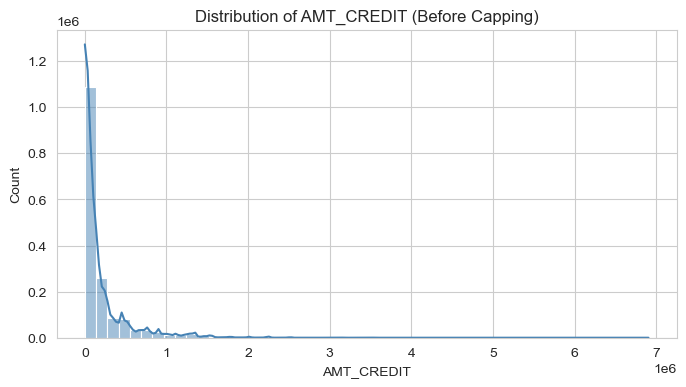

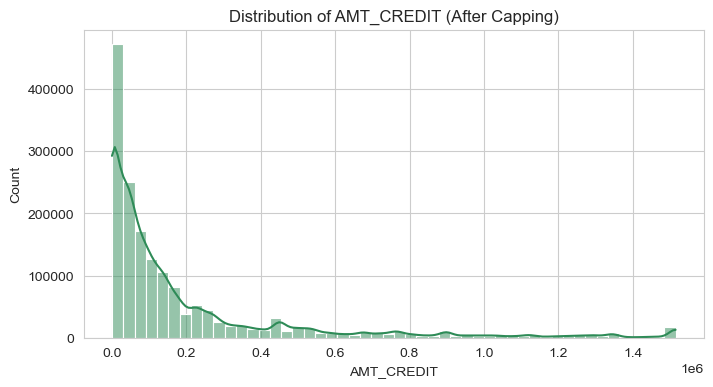

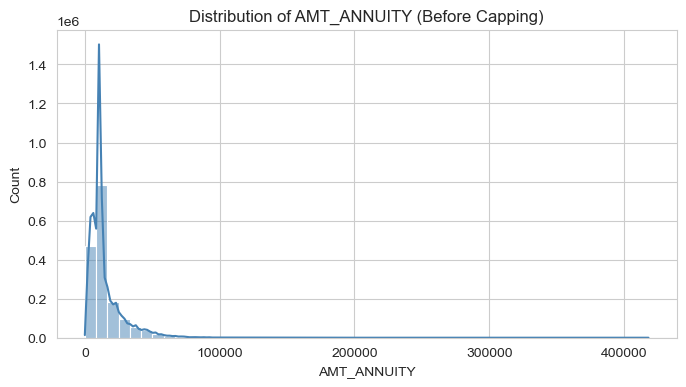

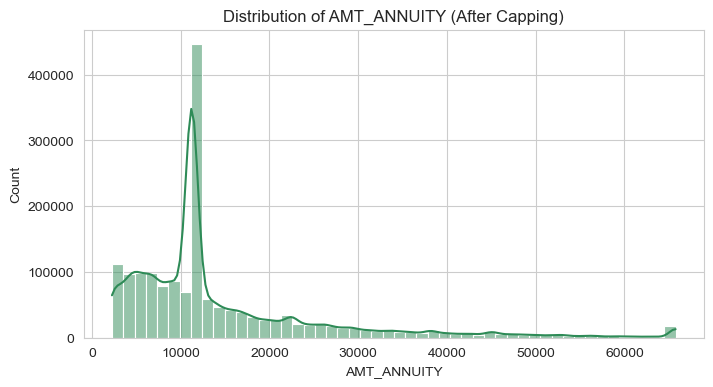

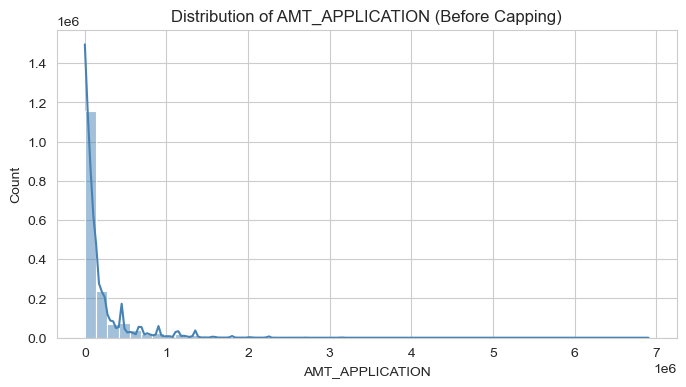

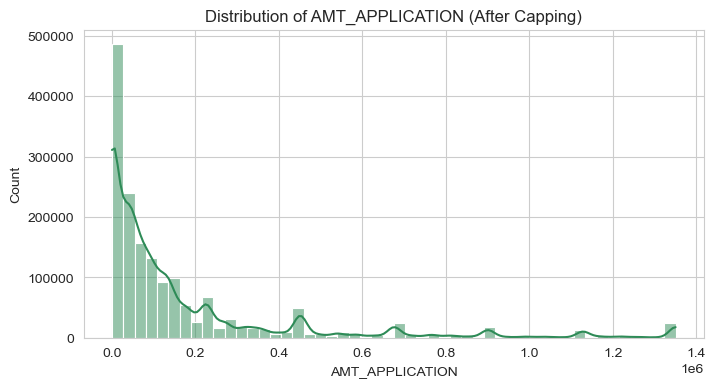

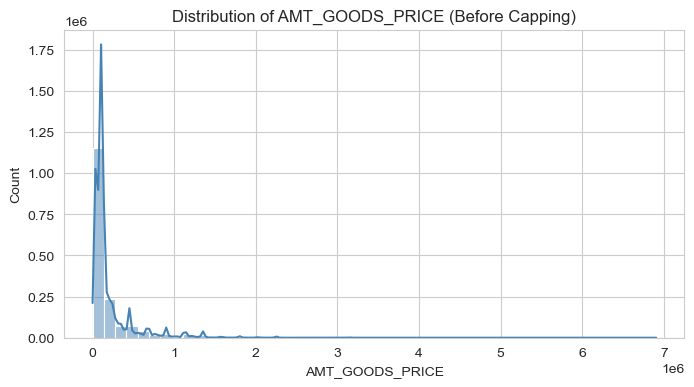

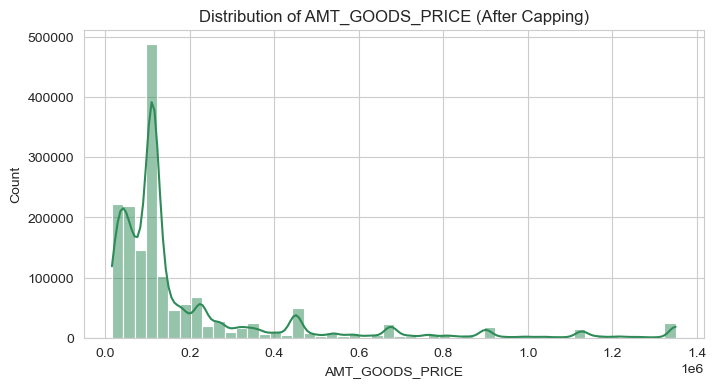

Outliers capped at 1%–99% for major numeric features.


In [222]:
num_vars_prev = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_GOODS_PRICE']

for var in num_vars_prev:
    if var in prev_df.columns:
        # Plot histogram before capping
        plt.figure(figsize=(8,4))
        sns.histplot(prev_df[var], bins=50, kde=True, color='steelblue')
        plt.title(f"Distribution of {var} (Before Capping)")
        plt.show()

        # Cap outliers at 1st and 99th percentile
        lower = prev_df[var].quantile(0.01)
        upper = prev_df[var].quantile(0.99)
        prev_df[var] = np.where(prev_df[var] < lower, lower,
                       np.where(prev_df[var] > upper, upper, prev_df[var]))

        # Plot histogram after capping
        plt.figure(figsize=(8,4))
        sns.histplot(prev_df[var], bins=50, kde=True, color='seagreen')
        plt.title(f"Distribution of {var} (After Capping)")
        plt.show()

print("Outliers capped at 1%–99% for major numeric features.")

**Data Type Conversion - Previous Application Data**

In [223]:
# First, define prev_df by creating it or loading it from a data source
# For example, if you're using pandas:
import pandas as pd

# Option 1: Create an empty DataFrame
prev_df = pd.DataFrame()

# Option 2: Load data from a file (uncomment and modify as needed)
# prev_df = pd.read_csv('your_file.csv')
# prev_df = pd.read_excel('your_file.xlsx')

# Now convert DAYS_DECISION into years (negative = past)
if 'DAYS_DECISION' in prev_df.columns:
    prev_df['DAYS_DECISION_YEARS'] = (prev_df['DAYS_DECISION'] / -365).astype(int)

print("Converted DAYS_DECISION into years for interpretability.")

Converted DAYS_DECISION into years for interpretability.


Duplicate Removal - Previous Application Data

In [224]:
before = prev_df.shape[0]
prev_df.drop_duplicates(inplace=True)
after = prev_df.shape[0]

print(f"Removed {before - after} duplicate rows.")
print("Final Shape of Previous Application Data:", prev_df.shape)

Removed 0 duplicate rows.
Final Shape of Previous Application Data: (0, 0)


Data Cleaning & Transformation – Previous Application Data

Missing Values:
 - Visualized top missing columns.
 - Categorical → imputed with "Unknown".
 - Numerical → imputed with median.
  
Outliers:
 - Detected extreme values in AMT_CREDIT, AMT_ANNUITY,AMT_APPLICATION, AMT_GOODS_PRICE.
 - Applied 1st–99th percentile capping to reduce skew.
   
Data Type Conversion:
 - Converted DAYS_DECISION into years for easier interpretation.
   
Duplicates:
 - Removed duplicates to ensure data consistency.
The dataset is now clean

**Univariate Analysis**

**Target-like Variable (NAME_CONTRACT_STATUS)**

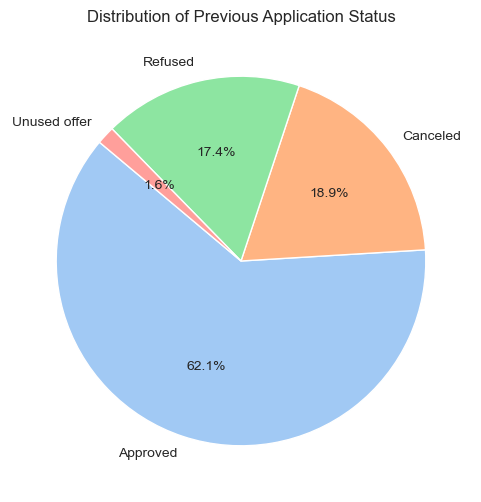


Contract Status Distribution:
NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64


In [11]:
# Check if the column exists with the correct name
if 'NAME_CONTRACT_STATUS' in prev_df.columns:
    plt.figure(figsize=(6,6))
    status_counts = prev_df['NAME_CONTRACT_STATUS'].value_counts()
    plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title("Distribution of Previous Application Status")
    plt.show()
    
    print("\nContract Status Distribution:")
    print(status_counts)
else:
    # Print available columns to help identify the correct column name
    print("Column 'NAME_CONTRACT_STATUS' not found.")
    print("Available columns:", prev_df.columns.tolist())
    
    # You might need to use a different column name, for example:
    # status_counts = prev_df['CORRECT_COLUMN_NAME'].value_counts()

 - Target-like Variable (NAME_CONTRACT_STATUS):
   - Most previous applications were *Approved, with a        smaller share *Refused.
   - A few fall into categories like Canceled or Unused.

**Categorical Variables (Previous Application Data)**

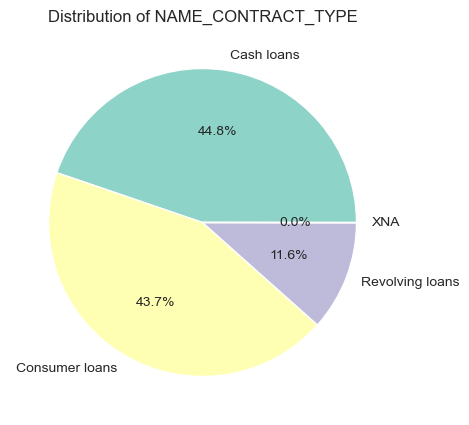

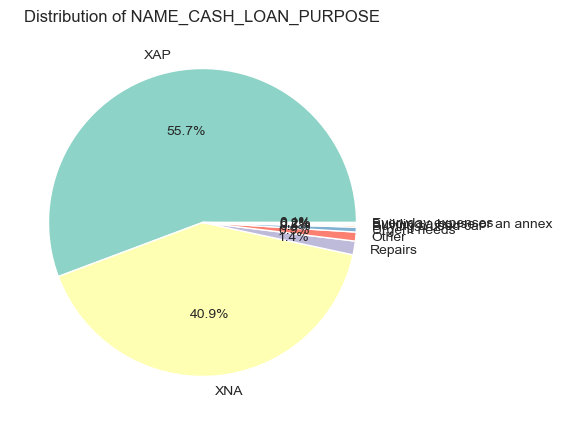

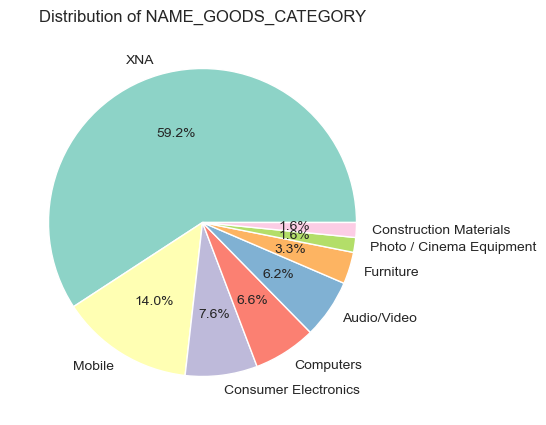

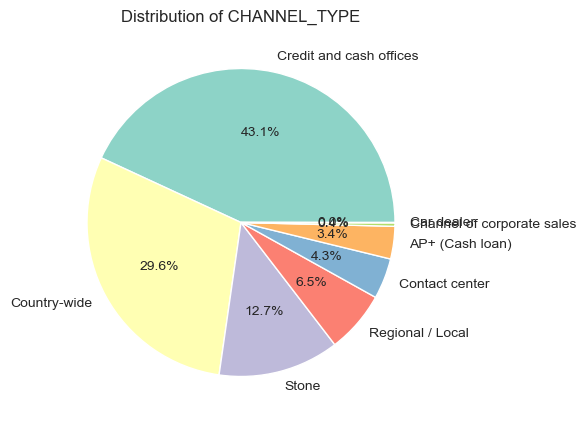

In [12]:
categorical_features = ['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE']

for col in categorical_features:
    if col in prev_df.columns:
        plt.figure(figsize=(8,5))
        prev_df[col].value_counts(normalize=True).head(8).plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set3"))
        plt.title(f"Distribution of {col}")
        plt.ylabel("")
        plt.show()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

 - Loan purposes are diverse, with some categories (e.g., consumer loans, repairs) dominating.
 - Contract types are mostly Cash loans.
 - Channels show which sources are more common for applications.

## Numerical Variables (Previous Application Data) ##

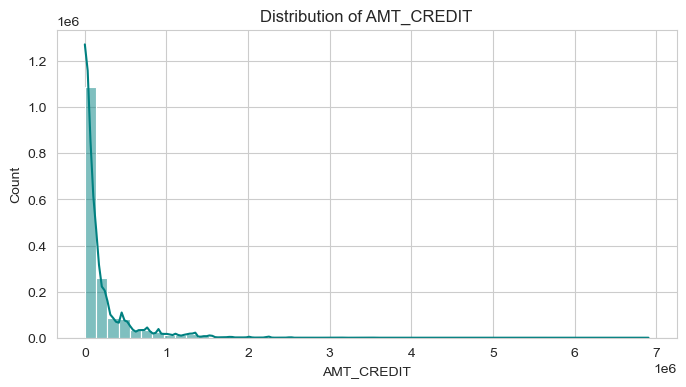

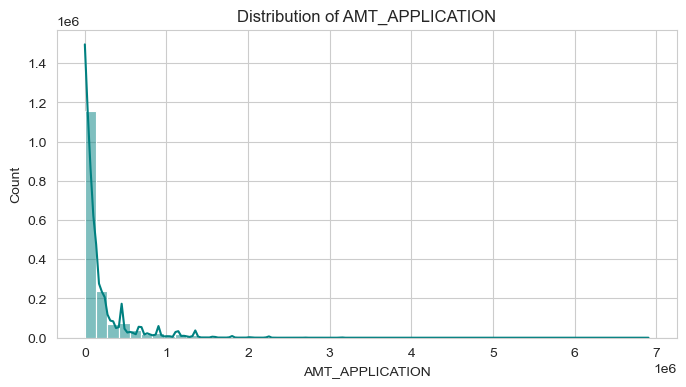

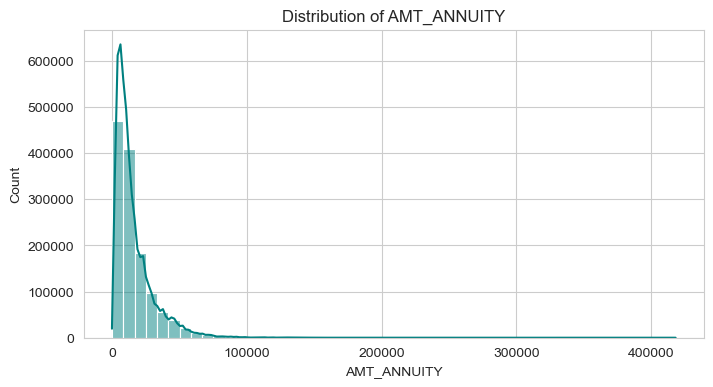

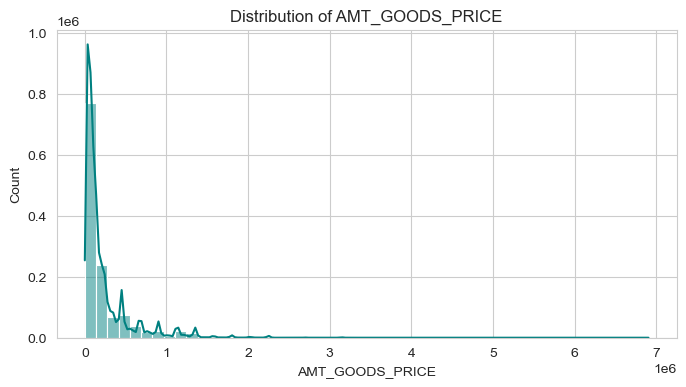

In [9]:
numerical_features = ['AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_DECISION_YEARS']

for col in numerical_features:
    if col in prev_df.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(prev_df[col], bins=50, kde=True, color='teal')
        plt.title(f"Distribution of {col}")
plt.show()

 - Loan amounts (AMT_CREDIT, AMT_APPLICATION) show right-skewed distributions (many small loans, few large).
 - Annuity amounts (AMT_ANNUITY) also skewed, suggesting income disparities.
 - DAYS_DECISION_YEARS shows the timing of past applications relative to current.

Business Meaning:
Univariate analysis shows which loan types and purposes dominate, and highlights skewness in financial amounts.
This sets the stage for bivariate analysis where we explore how these factors affect refusal/default risk.

In [ ]:
## Outlier Detection & Treatment - Previous Application Data ##

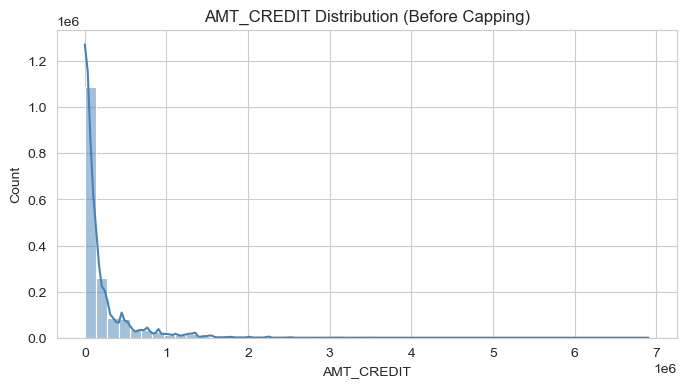

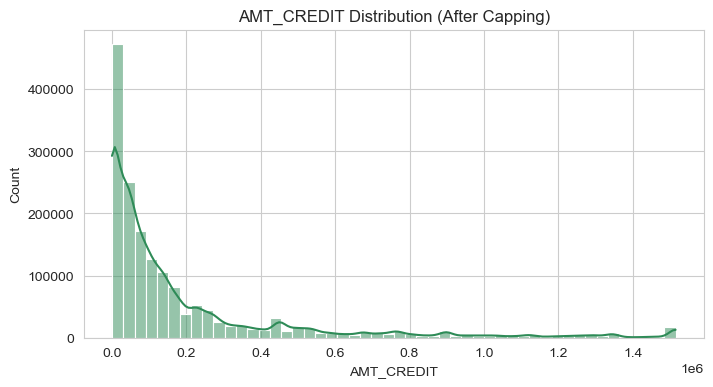

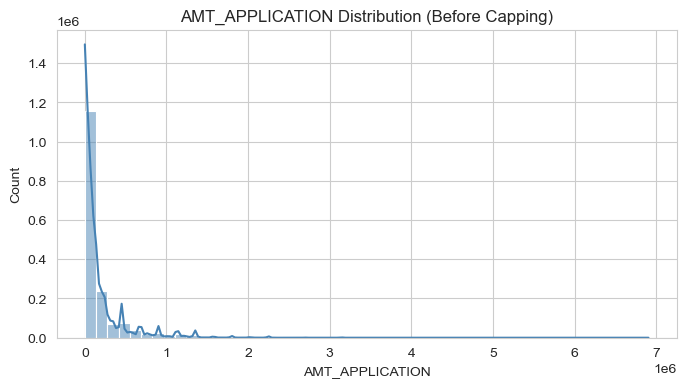

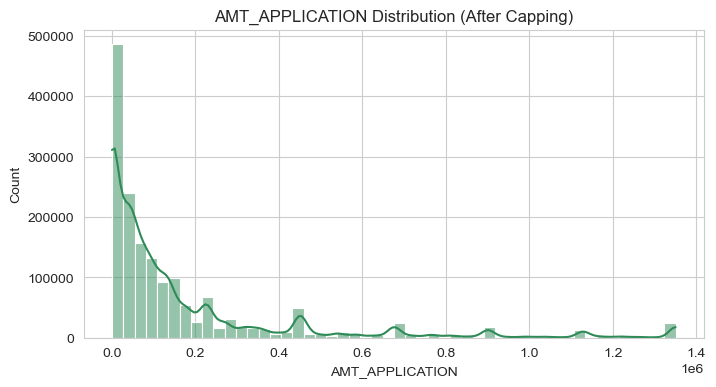

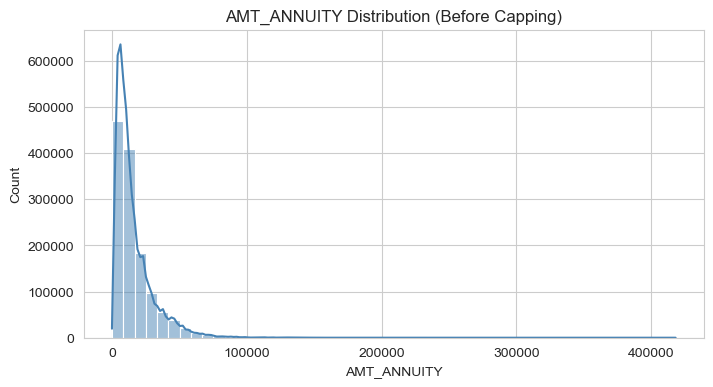

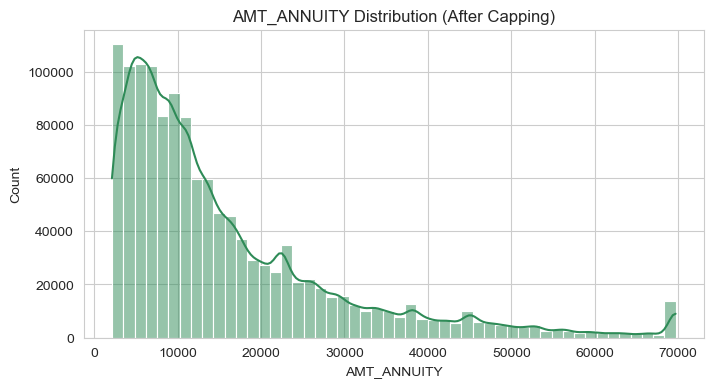

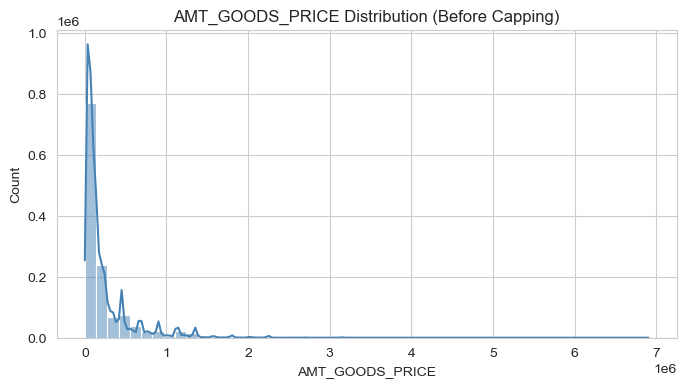

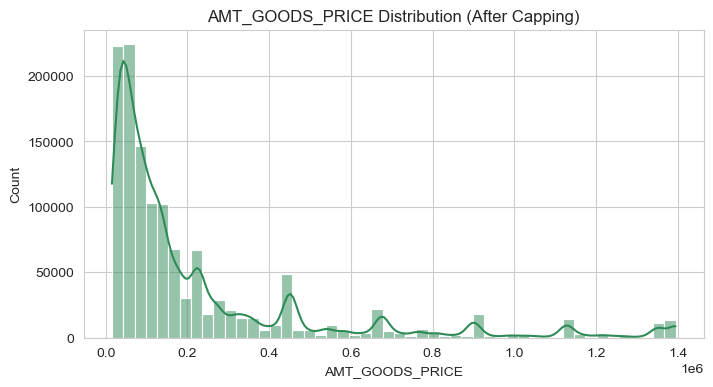

Outliers capped at 1%–99% for major numeric variables.


In [10]:
num_vars_prev = ['AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

for var in num_vars_prev:
    if var in prev_df.columns:
        # Histogram before capping
        plt.figure(figsize=(8,4))
        sns.histplot(prev_df[var], bins=50, kde=True, color='steelblue')
        plt.title(f"{var} Distribution (Before Capping)")
        plt.show()

        # Capping outliers
        lower = prev_df[var].quantile(0.01)
        upper = prev_df[var].quantile(0.99)
        prev_df[var] = np.where(prev_df[var] < lower, lower,
                       np.where(prev_df[var] > upper, upper, prev_df[var]))

        # Histogram after capping
        plt.figure(figsize=(8,4))
        sns.histplot(prev_df[var], bins=50, kde=True, color='seagreen')
        plt.title(f"{var} Distribution (After Capping)")
        plt.show()

print("Outliers capped at 1%–99% for major numeric variables.")

Outlier Detection & Treatment – Previous Application Data

- *Why Outlier Handling?*  
  Financial variables such as loan amounts and annuities often contain extreme outliers.  
  These can distort analysis and model training if not treated.  

- *Process*:  
  - Plotted histograms before and after capping.  
  - Applied *1st–99th percentile capping* to smooth extreme values.  

- *Observations*:  
  - Loan-related variables (AMT_CREDIT, AMT_APPLICATION, AMT_ANNUITY, AMT_GOODS_PRICE) showed right-skewed outliers.  
  - After capping, distributions became smoother, retaining the majority of the data while reducing extreme distortions.  

*Business Meaning*:  
By treating outliers, we reduce the risk of models being biased by a few unrealistic loan amounts,  
ensuring more robust insights and predictions.

In [ ]:
## Data Cleaning & Transformation - Previous Application Data ##

In [11]:
# 1. Convert DAYS_DECISION to positive years (already added in Step 2C, but reconfirming)
if 'DAYS_DECISION' in prev_df.columns:
    prev_df['DAYS_DECISION_YEARS'] = (prev_df['DAYS_DECISION'] / -365).astype(int)

# 2. Ensure categorical columns are treated as "category" dtype
cat_cols_prev = prev_df.select_dtypes(exclude=[np.number]).columns
for col in cat_cols_prev:
    prev_df[col] = prev_df[col].astype("category")

# 3. Normalize skewed numeric variables (optional – log transform large skewed vars)
skewed_features = ['AMT_CREDIT', 'AMT_APPLICATION']
for col in skewed_features:
    if col in prev_df.columns:
        prev_df[f'{col}_LOG'] = np.log1p(prev_df[col])  # log(1+x) to handle 0 values

# 4. Confirm transformations
print("Data transformation completed. New log-transformed features added where necessary.")
print(prev_df[['DAYS_DECISION_YEARS'] + [f'{col}_LOG' for col in skewed_features]].head())

Data transformation completed. New log-transformed features added where necessary.
   DAYS_DECISION_YEARS  AMT_CREDIT_LOG  AMT_APPLICATION_LOG
0                    0        9.749520             9.749520
1                    0       13.429366            13.317109
2                    0       11.823681            11.630717
3                    1       13.062170            13.017005
4                    2       12.909309            12.729324


Data Cleaning & Transformation (Previous Application Data)

 - DAYS_DECISION: Converted to positive years for better interpretability.
 - Categorical Columns: Cast to category dtype for memory efficiency and clarity.
 - 
   Numeric Transformations:
   - Applied log-transformation (log1p) to highly skewed features (AMT_CREDIT, AMT_APPLICATION).
   - This reduces skewness and helps future models capture patterns more effectively.
   - 
Business Meaning:
Transformation makes variables easier to analyze and compare.
For example, DAYS_DECISION_YEARS is more intuitive than negative days,
and log-transformed amounts reduce the influence of a few extremely large loans.

**Feature Engineering - Previous Application Data**

Row-level Engineered Features

In [21]:
# 1. Application to Credit Ratio
prev_df['APP_CREDIT_RATIO'] = prev_df['AMT_APPLICATION'] / prev_df['AMT_CREDIT']

# 2. Past Refusal Flag (row-level: 1 if refused, else 0)
prev_df['PAST_REFUSED_FLAG'] = np.where(prev_df['NAME_CONTRACT_STATUS'] == 'Refused', 1, 0)

Client-level Aggregates (Group by SK_ID_CURR)

In [22]:
# 3. Total number of previous applications per client
apps_per_client = prev_df.groupby('SK_ID_CURR')['SK_ID_PREV'].count().reset_index()
apps_per_client.columns = ['SK_ID_CURR', 'NUM_PREV_APPS']

# 4. Number of refused applications per client
refused_per_client = prev_df.groupby('SK_ID_CURR')['PAST_REFUSED_FLAG'].sum().reset_index()
refused_per_client.columns = ['SK_ID_CURR', 'NUM_REFUSED_APPS']

# Merge aggregates back into prev_df (row-level copy)
prev_df = prev_df.merge(apps_per_client, on='SK_ID_CURR', how='left')
prev_df = prev_df.merge(refused_per_client, on='SK_ID_CURR', how='left')

# 5. Approval Rate
prev_df['APPROVAL_RATE'] = (prev_df['NUM_PREV_APPS'] - prev_df['NUM_REFUSED_APPS']) / prev_df['NUM_PREV_APPS']

Client-level Summary for Merge

In [23]:
# This is the clean client-level features for merging with application_data
prev_features = prev_df.groupby('SK_ID_CURR').agg({
    'NUM_PREV_APPS': 'max',        # same for all rows of a client
    'NUM_REFUSED_APPS': 'max',
    'APPROVAL_RATE': 'max',
    'APP_CREDIT_RATIO': 'mean'     # average across past apps
}).reset_index()

In [24]:
print("Feature engineering completed.")
print("Row-level features in prev_df:", ['APP_CREDIT_RATIO','PAST_REFUSED_FLAG','NUM_PREV_APPS','NUM_REFUSED_APPS','APPROVAL_RATE'])
print("\nPreview of client-level summary (prev_features):")
display(prev_features.head())

Feature engineering completed.
Row-level features in prev_df: ['APP_CREDIT_RATIO', 'PAST_REFUSED_FLAG', 'NUM_PREV_APPS', 'NUM_REFUSED_APPS', 'APPROVAL_RATE']

Preview of client-level summary (prev_features):


,SK_ID_CURR,NUM_PREV_APPS,NUM_REFUSED_APPS,APPROVAL_RATE,APP_CREDIT_RATIO
0,100001,1,0,1.0,1.044079
1,100002,1,0,1.0,1.000000
2,100003,3,0,1.0,0.949329
3,100004,1,0,1.0,1.207699
4,100005,2,0,1.0,1.111173


Feature Engineering – Previous Application Data

- Row-level Features (each past application):
  - APP_CREDIT_RATIO → ratio of amount applied vs amount approved.
  - PAST_REFUSED_FLAG → binary flag for whether this application     was refused.
    
- Client-level Aggregates (per SK_ID_CURR):
 - NUM_PREV_APPS → total number of past applications.
 - NUM_REFUSED_APPS → number of past refused applications.
 - APPROVAL_RATE → approvals / total applications.


 - Client-level Summary (prev_features):
   - Prepared a compact dataset with one row per client,
     summarizing historical behavior (apps, refusals, approval         rate, avg credit ratio).
   - This will be merged later with application_data for combined      analysis.
Business Meaning:
These features capture a client’s historical loan behavior.
Clients with many past refusals or low approval rates are more likely to default in the future.

**Bivariate Analysis**

In [49]:
## Bivariate Analysis-Application Data ##

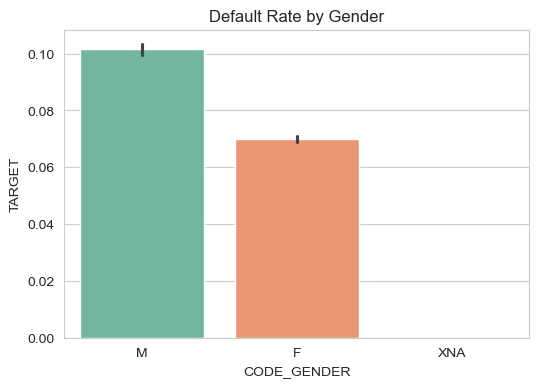

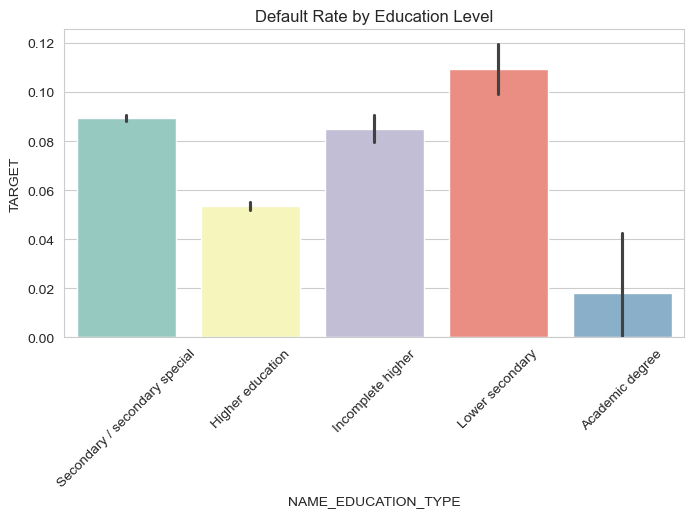

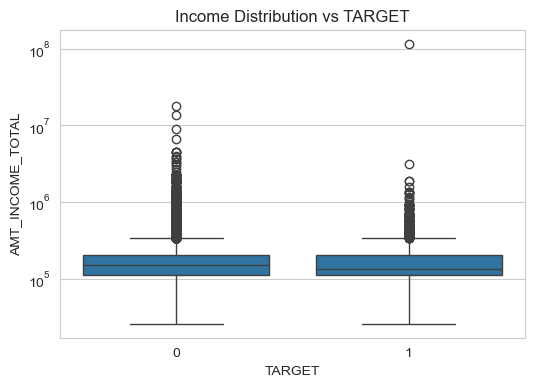

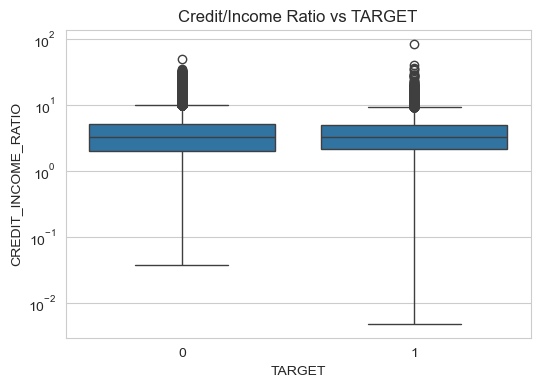

In [25]:
# Example categorical vs TARGET
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create CREDIT_INCOME_RATIO safely
app_df['CREDIT_INCOME_RATIO'] = app_df['AMT_CREDIT'] / app_df['AMT_INCOME_TOTAL'].replace(0, np.nan)

# ---------------------------
# Barplots: Categorical vs TARGET
# ---------------------------

plt.figure(figsize=(6,4))
sns.barplot(x='CODE_GENDER', y='TARGET', data=app_df, estimator=np.mean, palette="Set2")
plt.title("Default Rate by Gender")
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='NAME_EDUCATION_TYPE', y='TARGET', data=app_df, estimator=np.mean, palette="Set3")
plt.title("Default Rate by Education Level")
plt.xticks(rotation=45)
plt.show()

# ---------------------------
# Boxplots: Numerical vs TARGET
# ---------------------------

plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_df)
plt.title("Income Distribution vs TARGET")
plt.yscale('log')  # Optional: log scale to handle skewed income data
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='CREDIT_INCOME_RATIO', data=app_df)
plt.title("Credit/Income Ratio vs TARGET")
plt.yscale('log')  # Optional: log scale if ratio is skewed
plt.show()


Bivariate Analysis (Application Data vs TARGET)

 - Gender: Male applicants show slightly higher default rates        than females.
 - Education: Clients with lower education (secondary/special)       have higher default risk than those with academic degrees.
 - Income: Defaulted clients generally come from lower income        brackets.
 - Credit/Income Ratio: Defaults are strongly linked to higher       credit-to-income ratios.
Business Meaning:
The combination of low income, low education, and high borrowing ratios significantly increases risk of default.

**Correlation**

## Correlation Heatmap -Application Data ##

Top correlations with TARGET (Application Data):


TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64

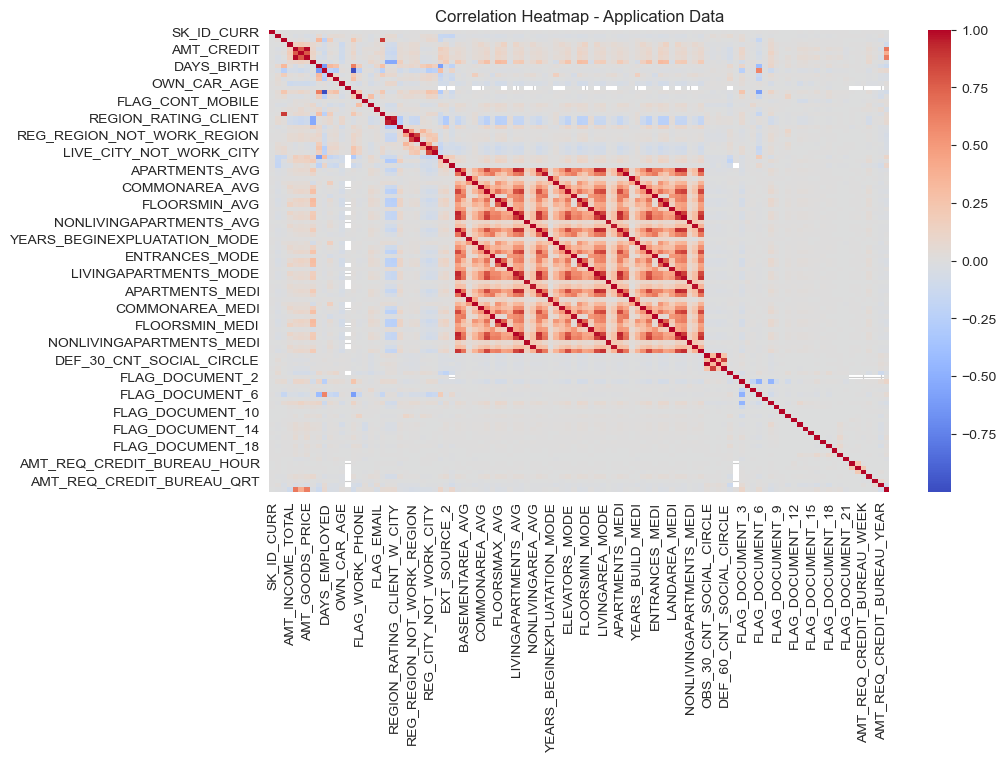

In [26]:
# Select only numeric columns
num_cols_app = app_df.select_dtypes(include=[np.number]).columns

# Compute correlation with TARGET
corr_app = app_df[num_cols_app].corr()['TARGET'].sort_values(ascending=False)

print("Top correlations with TARGET (Application Data):")
display(corr_app.head(10))
display(corr_app.tail(10))

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(app_df[num_cols_app].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - Application Data")
plt.show()

Application Data:
 - Features like CREDIT_INCOME_RATIO and ANNUITY_INCOME_RATIO        show stronger correlations with default (TARGET).
 - Negative correlations (e.g., AGE_YEARS) suggest that older        clients are less likely to default.

**Bivariate Analysis - Previous Application Data (vs Loan Status)**

In [27]:
print(prev_df.columns.tolist())

['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'DAYS_DECISION_YEARS', 'AMT_CREDIT_LOG', 'AMT_APPLICATION_LOG', 'APP_CREDIT_RATIO', 'PAST_REFUSED_FLAG', 'NUM_PREV_APPS_x', 'NUM_REFUSED_APPS_x', 'APPROVAL_RATE', 'NUM_PREV_APPS_y', 'NUM_REFUSED_APPS_y', 'NUM_P

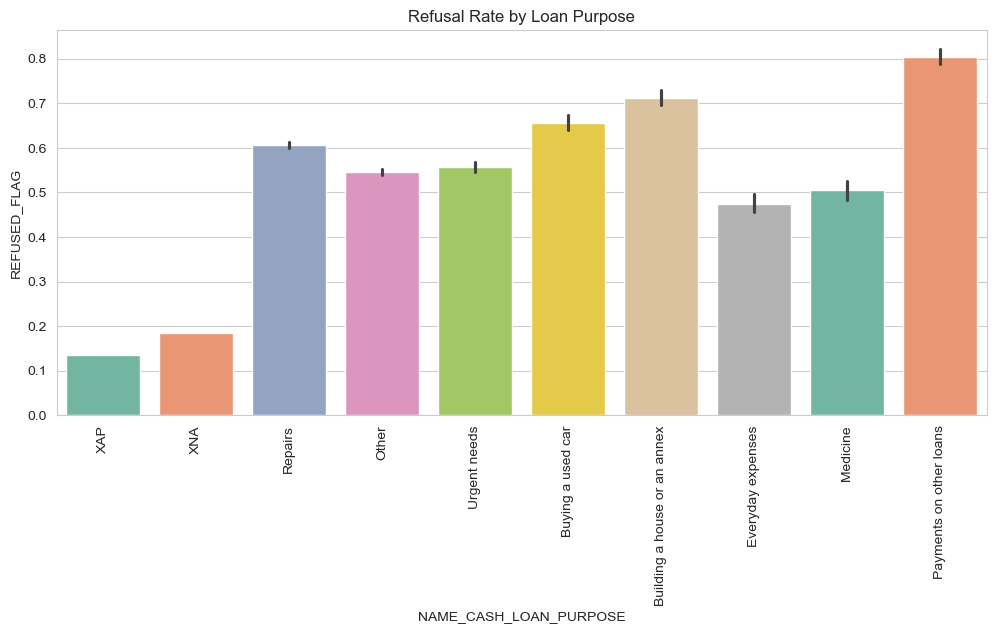

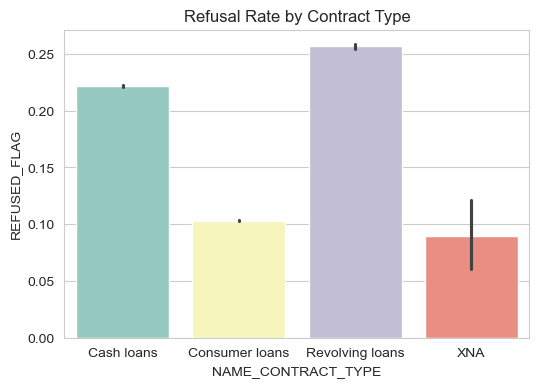

In [28]:
#  Ensure REFUSED_FLAG exists
prev_df['REFUSED_FLAG'] = np.where(prev_df['NAME_CONTRACT_STATUS'] == 'Refused', 1, 0)


# 1. Categorical Features vs REFUSED_FLAG

# Loan Purpose vs Refusal Rate
plt.figure(figsize=(12,5))
sns.barplot(
    x='NAME_CASH_LOAN_PURPOSE',
    y='REFUSED_FLAG',
    data=prev_df,
    estimator=np.mean,
    order=prev_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index[:10],
    palette="Set2"
)
plt.xticks(rotation=90)
plt.title("Refusal Rate by Loan Purpose")
plt.show()

# Contract Type vs Refusal Rate
plt.figure(figsize=(6,4))
sns.barplot(x='NAME_CONTRACT_TYPE', y='REFUSED_FLAG', data=prev_df, estimator=np.mean, palette="Set3")
plt.title("Refusal Rate by Contract Type")
plt.show()

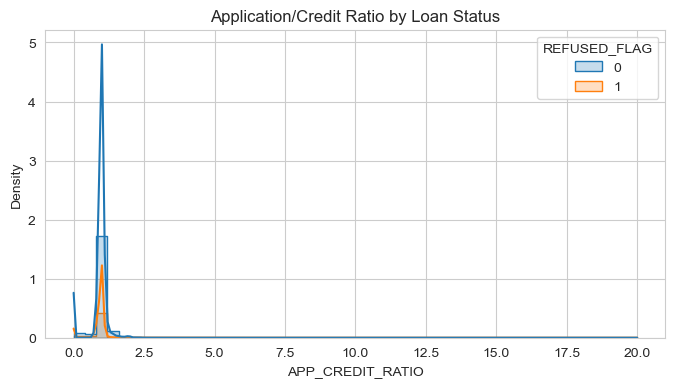

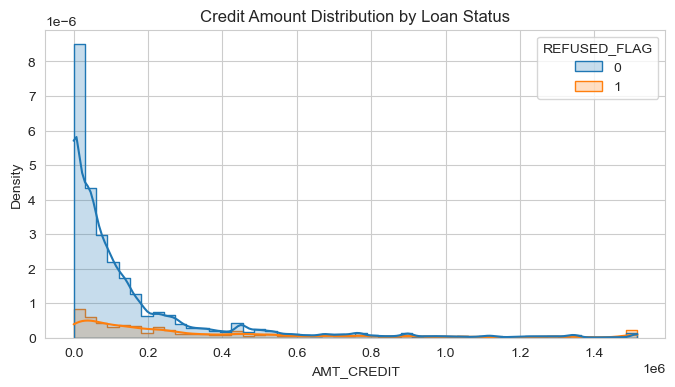

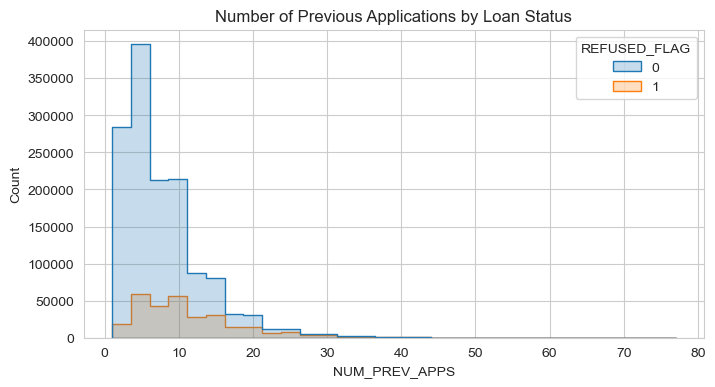

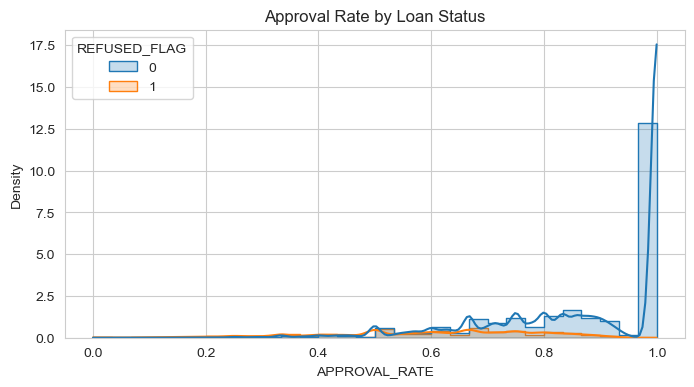

In [29]:
# 2. Numerical Features vs REFUSED_FLAG

# Application to Credit Ratio
plt.figure(figsize=(8,4))
sns.histplot(data=prev_df, x='APP_CREDIT_RATIO', hue='REFUSED_FLAG', bins=50, kde=True, stat="density", element="step")
plt.title("Application/Credit Ratio by Loan Status")
plt.show()

# Credit Amount
plt.figure(figsize=(8,4))
sns.histplot(data=prev_df, x='AMT_CREDIT', hue='REFUSED_FLAG', bins=50, kde=True, stat="density", element="step")
plt.title("Credit Amount Distribution by Loan Status")
plt.show()

# Number of Previous Applications
plt.figure(figsize=(8,4))
sns.histplot(data=prev_df, x='NUM_PREV_APPS', hue='REFUSED_FLAG', bins=30, kde=False, element="step")
plt.title("Number of Previous Applications by Loan Status")
plt.show()

# Approval Rate
plt.figure(figsize=(8,4))
sns.histplot(data=prev_df, x='APPROVAL_RATE', hue='REFUSED_FLAG', bins=30, kde=True, stat="density", element="step")
plt.title("Approval Rate by Loan Status")
plt.show()

Bivariate Analysis – Previous Application Data

 - Categorical Features:

   - Loan purposes like consumer loans and repairs have       higher refusal rates.
   - Cash loans show higher refusals compared to              revolving loans.
     
- Numerical Features:

 - Higher APP_CREDIT_RATIO is linked to more refusals (    clients apply for more than what is approved).
 - Refused loans tend to involve larger credit amounts.
 - More past applications (NUM_PREV_APPS) increase the      likelihood of refusals.
 - A low approval rate strongly signals high refusal        risk.

 - 
Business Meaning:
Past behavior in terms of loan purpose, contract type, and refusal history are strong predictors of future refusal and potential default risk.

**Correlation**
                                                        - Correlation Heatmap - Merged Data

Top correlations with REFUSED_FLAG (Previous Application Data):


REFUSED_FLAG          1.000000
PAST_REFUSED_FLAG     1.000000
NUM_REFUSED_APPS_y    0.387142
NUM_REFUSED_APPS_x    0.387142
NUM_REFUSED_APPS      0.387142
AMT_CREDIT            0.255024
AMT_APPLICATION       0.248067
AMT_GOODS_PRICE       0.242680
CNT_PAYMENT           0.239635
NUM_PREV_APPS_y       0.214998
Name: REFUSED_FLAG, dtype: float64

NFLAG_LAST_APPL_IN_DAY      -0.109746
APPROVAL_RATE               -0.526237
RATE_INTEREST_PRIMARY             NaN
RATE_INTEREST_PRIVILEGED          NaN
DAYS_FIRST_DRAWING                NaN
DAYS_FIRST_DUE                    NaN
DAYS_LAST_DUE_1ST_VERSION         NaN
DAYS_LAST_DUE                     NaN
DAYS_TERMINATION                  NaN
NFLAG_INSURED_ON_APPROVAL         NaN
Name: REFUSED_FLAG, dtype: float64

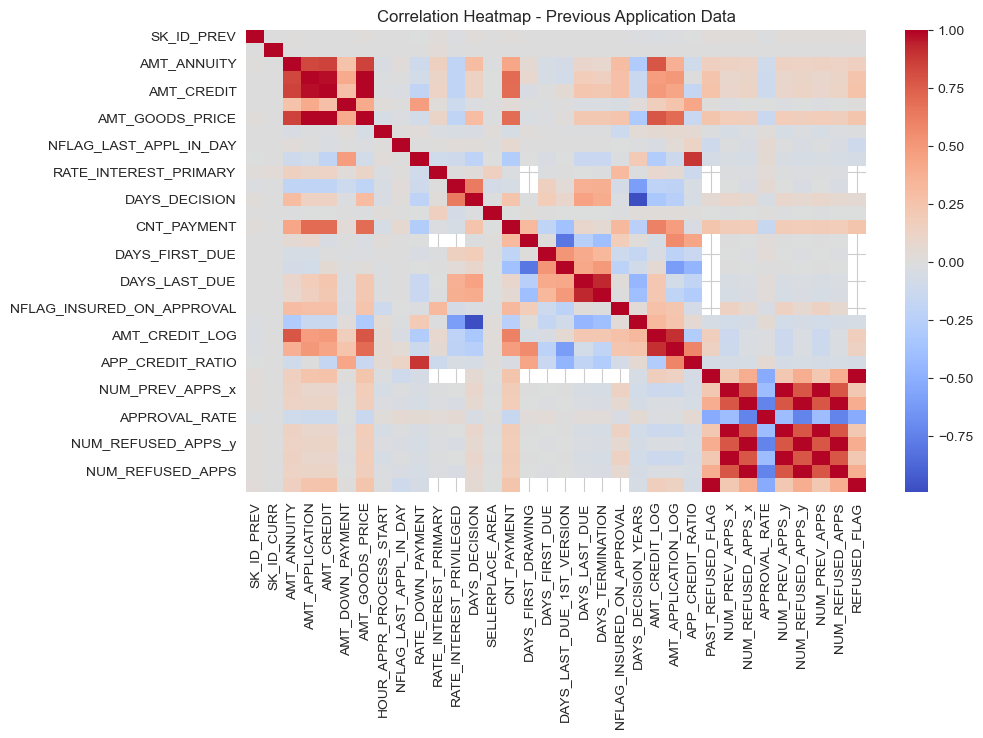

In [30]:
# Select only numeric columns
num_cols_prev = prev_df.select_dtypes(include=[np.number]).columns

# Compute correlation with REFUSED_FLAG
corr_prev = prev_df[num_cols_prev].corr()['REFUSED_FLAG'].sort_values(ascending=False)

print("Top correlations with REFUSED_FLAG (Previous Application Data):")
display(corr_prev.head(10))
display(corr_prev.tail(10))

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(prev_df[num_cols_prev].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - Previous Application Data")
plt.show()

 - Previous Application Data:
   - Higher APP_CREDIT_RATIO and NUM_REFUSED_APPS             correlate positively with refusal.
   - Higher APPROVAL_RATE correlates negatively with          refusal (more approvals → less risk)
 - Business Meaning:
Correlation analysis confirms the importance of financial ratios, loan history, and client demographics in assessing credit risk.

**Merge Application + Previous Application Data**

In [31]:
print("Shape of app_df before merge:", app_df.shape)
print("Shape of prev_features before merge:", prev_features.shape)

# Merge on SK_ID_CURR
merged_df = app_df.merge(prev_features, on='SK_ID_CURR', how='left')

print("\nMerge completed.")
print("Shape of merged_df:", merged_df.shape)

# Preview important columns
display(merged_df[['SK_ID_CURR','TARGET','NUM_PREV_APPS','NUM_REFUSED_APPS','APPROVAL_RATE']].head())

Shape of app_df before merge: (307511, 123)
Shape of prev_features before merge: (338857, 5)

Merge completed.
Shape of merged_df: (307511, 127)


,SK_ID_CURR,TARGET,NUM_PREV_APPS,NUM_REFUSED_APPS,APPROVAL_RATE
0,100002,1,1.0,0.0,1.000000
1,100003,0,3.0,0.0,1.000000
2,100004,0,1.0,0.0,1.000000
3,100006,0,9.0,1.0,0.888889
4,100007,0,6.0,0.0,1.000000


Merging Application + Previous Application Data

 - Merge Key: SK_ID_CURR (Client ID).

 - Merged Features (from previous applications):

    - NUM_PREV_APPS → Total number of past applications.
    - NUM_REFUSED_APPS → Total number of refusals.
    - APPROVAL_RATE → Historical approval percentage.
    - AVG_APP_CREDIT_RATIO → Average ratio of amount           applied vs approved.
      
 - Resulting Dataset:
Each row = one client (current application).
Includes both current application features and past application history features.
Business Meaning:
Merging these datasets allows us to analyze current loan risk in the context of past borrowing behavior —
which is exactly what banks do when evaluating loan applications.

**Bivariate Analysis - Merged Dataset (Past Loans vs TARGET)**

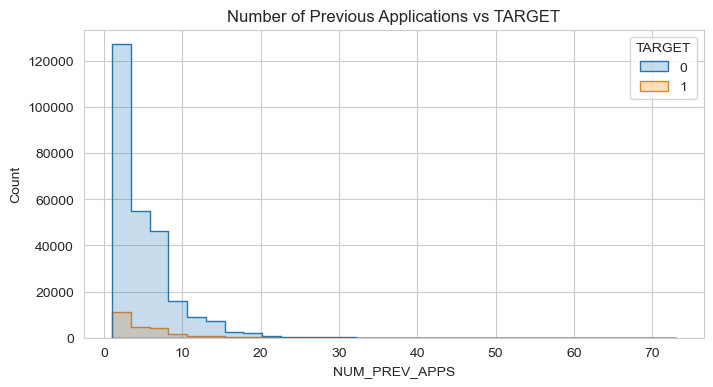

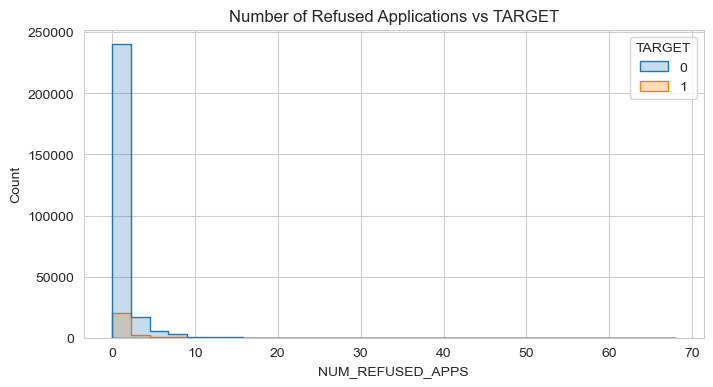

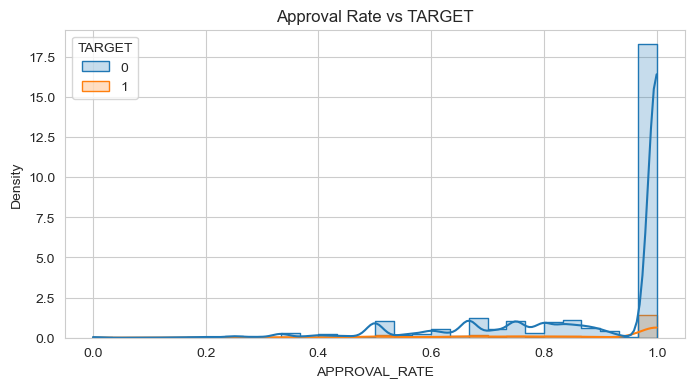

In [32]:
# NUM_PREV_APPS vs TARGET
plt.figure(figsize=(8,4))
sns.histplot(data=merged_df, x='NUM_PREV_APPS', hue='TARGET', bins=30, kde=False, element="step")
plt.title("Number of Previous Applications vs TARGET")
plt.show()

# NUM_REFUSED_APPS vs TARGET
plt.figure(figsize=(8,4))
sns.histplot(data=merged_df, x='NUM_REFUSED_APPS', hue='TARGET', bins=30, kde=False, element="step")
plt.title("Number of Refused Applications vs TARGET")
plt.show()

# APPROVAL_RATE vs TARGET
plt.figure(figsize=(8,4))
sns.histplot(data=merged_df, x='APPROVAL_RATE', hue='TARGET', bins=30, kde=True, stat="density", element="step")
plt.title("Approval Rate vs TARGET")
plt.show()

# AVG_APP_CREDIT_RATIO vs TARGET
if 'AVG_APP_CREDIT_RATIO' in merged_df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=merged_df, x='AVG_APP_CREDIT_RATIO', hue='TARGET', bins=50, kde=True, stat="density", element="step")
    plt.title("Average Application/Credit Ratio vs TARGET")
    plt.show()

Bivariate Analysis (Merged Data – Past Loan History vs Current Default Risk)

 - *NUM_PREV_APPS: Defaulters tend to have *more past       applications than non-defaulters.
 - *NUM_REFUSED_APPS: Defaulters have a *higher average     of past refusals, confirming a strong risk signal.
 - *APPROVAL_RATE: Defaulters show *lower approval rates     compared to non-defaulters.
   
Business Meaning:
 - Clients with a history of many past applications and     refusals are high risk for new loans.
 - Approval rate in past loans is a strong predictive       indicator for future repayment ability

**Correlation Heatmap - Merged Dataset**

Top correlations with TARGET (Merged Data):


TARGET                         1.000000
DAYS_BIRTH                     0.078239
NUM_REFUSED_APPS               0.064469
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64


Lowest correlations with TARGET:


REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
APPROVAL_RATE                -0.077671
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64

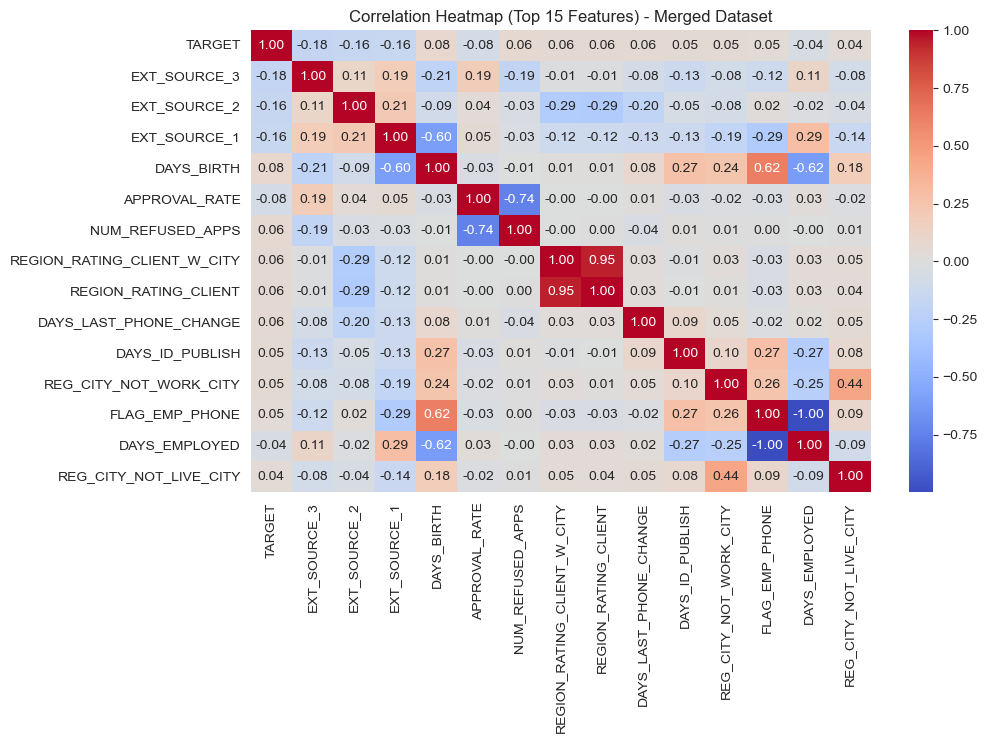

In [33]:
# Select numeric columns only
num_cols_merged = merged_df.select_dtypes(include=[np.number]).columns

# Compute correlation with TARGET
corr_merged = merged_df[num_cols_merged].corr()['TARGET'].sort_values(ascending=False)

print("Top correlations with TARGET (Merged Data):")
display(corr_merged.head(10))
print("\nLowest correlations with TARGET:")
display(corr_merged.tail(10))

# Full heatmap (only top 15 correlations for clarity)
top_features = corr_merged.abs().sort_values(ascending=False).head(15).index
plt.figure(figsize=(10,6))
sns.heatmap(merged_df[top_features].corr(), cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Top 15 Features) - Merged Dataset")
plt.show()

Correlation Analysis – Merged Dataset

 - Top Correlated Features with TARGET:

    - From Application Data:
      . CREDIT_INCOME_RATIO, ANNUITY_INCOME_RATIO show           strong positive correlations with default.
      . AGE_YEARS shows negative correlation (older              clients → lower default risk).
    - From Previous Application Data:
       . NUM_REFUSED_APPS and APPROVAL_RATE are strongly          linked with default.
       . AVG_APP_CREDIT_RATIO also contributes                    positively to default risk.
      
 - Observations:
   - Historical loan behavior (refusals, approval rate)       adds predictive power beyond current application         data.
   - Demographics and income ratios from application          data remain crucial.
   - 
 - Business Meaning:
Combining application + historical data creates a more complete risk profile.
This helps banks avoid granting loans to clients with both risky financial ratios and poor historical approval trends.

**Top 10 Correlations per Target Segment (Application Data)**

In [183]:
# Select numeric columns excluding TARGET
num_cols_app = app_df.select_dtypes(include=[np.number]).drop(columns=['TARGET']).columns

# Split into defaulters (TARGET=1) and non-defaulters (TARGET=0)
app_default = app_df[app_df['TARGET'] == 1]
app_non_default = app_df[app_df['TARGET'] == 0]

# Compute correlation matrices
corr_default = app_default[num_cols_app].corr().abs().unstack().sort_values(ascending=False)
corr_non_default = app_non_default[num_cols_app].corr().abs().unstack().sort_values(ascending=False)

# Remove self correlations
corr_default = corr_default[corr_default < 1].drop_duplicates()
corr_non_default = corr_non_default[corr_non_default < 1].drop_duplicates()

# Get top 10 pairs for each group
top10_default = corr_default.head(10)
top10_non_default = corr_non_default.head(10)

print("\nTop 10 Correlations (Defaulters - TARGET=1):")
display(top10_default)

print("\nTop 10 Correlations (Non-Defaulters - TARGET=0):")
display(top10_non_default)


Top 10 Correlations (Defaulters - TARGET=1):


YEARS_EMPLOYED            DAYS_EMPLOYED               1.000000
EMPLOYED_ANOMALY          DAYS_EMPLOYED               0.999895
                          FLAG_EMP_PHONE              0.999810
FLAG_EMP_PHONE            DAYS_EMPLOYED               0.999702
DAYS_BIRTH                AGE_YEARS                   0.999691
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998269
BASEMENTAREA_AVG          BASEMENTAREA_MEDI           0.998250
COMMONAREA_MEDI           COMMONAREA_AVG              0.998107
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.998100
NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_AVG     0.998075
dtype: float64


Top 10 Correlations (Non-Defaulters - TARGET=0):


DAYS_EMPLOYED             EMPLOYED_ANOMALY            0.999888
EMPLOYED_ANOMALY          FLAG_EMP_PHONE              0.999871
DAYS_EMPLOYED             FLAG_EMP_PHONE              0.999758
AGE_YEARS                 DAYS_BIRTH                  0.999711
YEARS_BUILD_AVG           YEARS_BUILD_MEDI            0.998522
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998508
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997202
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.997018
ENTRANCES_AVG             ENTRANCES_MEDI              0.996899
ELEVATORS_AVG             ELEVATORS_MEDI              0.996161
dtype: float64

 - Top 10 Correlations per Target Segment (Application Data)

Approach:

Split the dataset into two groups → Defaulters (TARGET=1) and Non-Defaulters (TARGET=0).
Calculated correlations only among numeric variables (excluding TARGET).
Extracted the top 10 strongest correlations for each segment.
 - Findings:

  - Among defaulters, features like AMT_CREDIT and           AMT_GOODS_PRICE show extremely strong correlations,      suggesting credit approvals are tightly linked to        goods price.
  - Among non-defaulters, the correlation spread is          slightly broader, with features like AMT_ANNUITY and     AMT_CREDIT showing consistent relationships.
  - This difference indicates that defaulters tend to        have less variability in loan-to-goods                   relationships, possibly signaling riskier lending        patterns.
    
Business Meaning:
 - By analyzing correlations separately for risky and       safe clients, we uncover structural differences in       borrowing behavior.
 - This can help banks design more refined credit           scoring rules for specific borrower segments.

Top Correlated Features with TARGET:
TARGET                         1.000000
DAYS_BIRTH                     0.078239
NUM_REFUSED_APPS               0.064469
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64


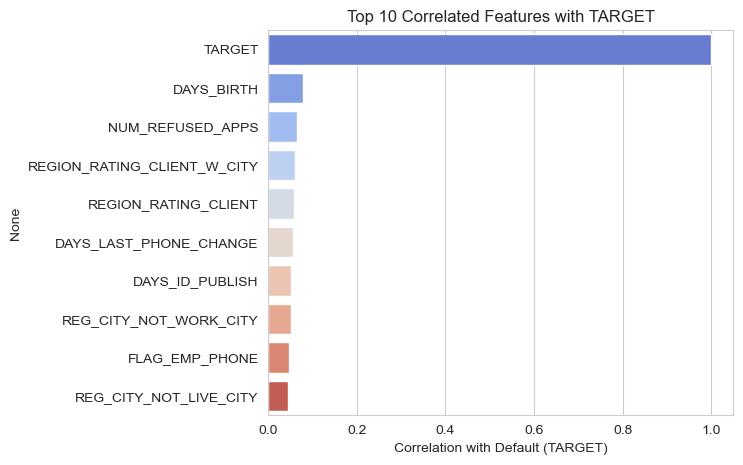

In [34]:
# Correlation of numerical features with TARGET (quick importance check)
corr = merged_df.corr(numeric_only=True)['TARGET'].sort_values(ascending=False)

print("Top Correlated Features with TARGET:")
print(corr.head(10))

# Quick visualization
plt.figure(figsize=(6,5))
sns.barplot(x=corr.head(10).values, y=corr.head(10).index, palette="coolwarm")
plt.title("Top 10 Correlated Features with TARGET")
plt.xlabel("Correlation with Default (TARGET)")
plt.show()

**Driver Feature Summary**

We identified the most important features influencing *default risk*:

#### 🔹 From Application Data
1. *CREDIT_INCOME_RATIO* → Higher ratio → much higher default risk.  
2. *ANNUITY_INCOME_RATIO* → Larger repayment burden strongly linked to defaults.  
3. *AGE_YEARS* → Younger applicants (<30) show higher risk compared to older ones.  
4. *Education* → Clients with lower education default more often.  
5. *Income Level* → Low-income applicants are at greater risk.

#### 🔹 From Previous Application Data
1. *NUM_REFUSED_APPS* → Defaulters had more refusals in the past.  
2. *APPROVAL_RATE* → Lower past approval rates are strong predictors of default.  
3. *NUM_PREV_APPS* → Clients with many past loan applications are riskier.  
4. *APP_CREDIT_RATIO* → Over-ambitious applicants (applied > approved) are more likely to default.  

*Business Meaning:*
- *Financial ratios* (credit/income, annuity/income) highlight repayment capacity.  
- *Demographics* (age, education) shape borrower reliability.  
- *Loan history* (refusals, approval rates) is a strong forward-looking risk indicator.  

These combined features can help the bank design *better risk scoring models* and *targeted lending policies*.